In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
from torch.utils.data import DataLoader, Dataset
import numpy as np
from helper import *
import sklearn 

In [2]:
data = torch.from_numpy(getData("Data/rbcL_ordinal_encoding.txt", 50000)).float()

In [3]:
print(data.shape)

torch.Size([50000, 300])


In [4]:
print(data[0])

tensor([1., 4., 3., 4., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 3., 1., 1.,
        1., 2., 4., 1., 1., 1., 3., 2., 1., 3., 3., 4., 3., 4., 4., 3., 3., 1.,
        4., 4., 4., 1., 1., 1., 3., 2., 4., 3., 3., 4., 3., 4., 4., 1., 1., 1.,
        3., 1., 4., 4., 1., 4., 1., 1., 1., 4., 4., 3., 1., 2., 4., 4., 1., 2.,
        4., 1., 2., 1., 2., 2., 2., 2., 1., 3., 1., 3., 4., 1., 4., 3., 1., 1.,
        1., 2., 4., 1., 1., 3., 3., 1., 4., 1., 2., 4., 3., 1., 4., 1., 4., 2.,
        4., 4., 3., 3., 2., 1., 3., 2., 1., 4., 4., 2., 2., 3., 1., 3., 4., 1.,
        1., 3., 4., 2., 2., 4., 2., 1., 3., 2., 2., 4., 3., 3., 3., 3., 4., 4.,
        2., 2., 3., 2., 2., 2., 3., 1., 1., 3., 1., 1., 3., 2., 1., 3., 3., 3.,
        3., 2., 4., 3., 2., 1., 3., 4., 1., 3., 2., 4., 3., 2., 2., 3., 1., 1.,
        4., 2., 4., 4., 2., 4., 1., 2., 4., 3., 3., 4., 1., 2., 1., 4., 3., 3.,
        1., 2., 1., 1., 2., 4., 3., 4., 4., 4., 3., 3., 1., 2., 4., 3., 1., 4.,
        3., 3., 1., 2., 4., 4., 1., 2., 

In [5]:
def cosine_distance(x, y):
    return 1 - torch.nn.functional.cosine_similarity(x, y)

class Linear(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Linear, self).__init__()
        self.embedding = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size)
        )

    def forward(self, x):
        embedded_x = self.embedding(x)
        return embedded_x

class DNADataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.sequences[idx])

input_size = data.shape[1]
hidden_size = 256

model = Linear(input_size, hidden_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

dataset = DNADataset(data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

epochs = 20
          
criterion = nn.MSELoss()

losses = []

# for epoch in range(epochs):
#     for batch in dataloader:
#         optimizer.zero_grad()
#         x1, x2 = torch.chunk(batch, 2, dim=0)

#         embedded_x1 = model(x1)
#         embedded_x2 = model(x2)

#         target = cosine_distance(x1, x2)

#         real = cosine_distance(embedded_x1, embedded_x2)

#         loss = criterion(target, real)
#         losses.append(loss)

#         loss.backward()
#         optimizer.step()
#     print(f"Batch loss is {loss}")
    
#     print("Training epoch {ep} done".format(ep=epoch))

# torch.save(model.state_dict(), 'linear.pth')



In [6]:
model = Linear(input_size, hidden_size)
model.load_state_dict(torch.load('linear.pth'))
model.eval()

Linear(
  (embedding): Sequential(
    (0): Linear(in_features=300, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
)

In [7]:
sequences = data.detach().numpy()

In [8]:
print(sequences[0])

[1. 4. 3. 4. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 3. 1. 1. 1. 2. 4. 1. 1. 1.
 3. 2. 1. 3. 3. 4. 3. 4. 4. 3. 3. 1. 4. 4. 4. 1. 1. 1. 3. 2. 4. 3. 3. 4.
 3. 4. 4. 1. 1. 1. 3. 1. 4. 4. 1. 4. 1. 1. 1. 4. 4. 3. 1. 2. 4. 4. 1. 2.
 4. 1. 2. 1. 2. 2. 2. 2. 1. 3. 1. 3. 4. 1. 4. 3. 1. 1. 1. 2. 4. 1. 1. 3.
 3. 1. 4. 1. 2. 4. 3. 1. 4. 1. 4. 2. 4. 4. 3. 3. 2. 1. 3. 2. 1. 4. 4. 2.
 2. 3. 1. 3. 4. 1. 1. 3. 4. 2. 2. 4. 2. 1. 3. 2. 2. 4. 3. 3. 3. 3. 4. 4.
 2. 2. 3. 2. 2. 2. 3. 1. 1. 3. 1. 1. 3. 2. 1. 3. 3. 3. 3. 2. 4. 3. 2. 1.
 3. 4. 1. 3. 2. 4. 3. 2. 2. 3. 1. 1. 4. 2. 4. 4. 2. 4. 1. 2. 4. 3. 3. 4.
 1. 2. 1. 4. 3. 3. 1. 2. 1. 1. 2. 4. 3. 4. 4. 4. 3. 3. 1. 2. 4. 3. 1. 4.
 3. 3. 1. 2. 4. 4. 1. 2. 4. 1. 3. 4. 2. 4. 4. 3. 1. 4. 2. 3. 4. 4. 1. 2.
 1. 1. 1. 3. 3. 1. 2. 3. 1. 4. 3. 2. 4. 1. 4. 4. 1. 2. 1. 4. 2. 3. 1. 3.
 2. 2. 4. 3. 4. 4. 2. 2. 4. 3. 3. 3. 3. 1. 1. 3. 1. 2. 1. 1. 2. 2. 1. 1.
 4. 4. 4. 1. 4. 2. 4. 3. 4. 4. 1. 4.]


In [10]:
num_clusters = pairWiseCrossValidation(data, sequences, model)

Label 0: Count 25007
Label 1: Count 22246
Label 2: Count 2747
Label 0: Count 17278
Label 1: Count 28534
Label 2: Count 2747
Label 3: Count 1441
Label 0: Count 2999
Label 1: Count 18064
Label 2: Count 1441
Label 3: Count 24749
Label 4: Count 2747
Label 0: Count 1740
Label 1: Count 2747
Label 2: Count 1441
Label 3: Count 19741
Label 4: Count 12143
Label 5: Count 12188
Label 0: Count 10761
Label 1: Count 2747
Label 2: Count 17564
Label 3: Count 1740
Label 4: Count 1441
Label 5: Count 2353
Label 6: Count 13394
Label 0: Count 1740
Label 1: Count 13390
Label 2: Count 2081
Label 3: Count 14280
Label 4: Count 2747
Label 5: Count 1441
Label 6: Count 12880
Label 7: Count 1441
Label 0: Count 14616
Label 1: Count 1740
Label 2: Count 2217
Label 3: Count 2747
Label 4: Count 9854
Label 5: Count 1280
Label 6: Count 1441
Label 7: Count 3705
Label 8: Count 12400
Label 0: Count 7295
Label 1: Count 1740
Label 2: Count 4830
Label 3: Count 1441
Label 4: Count 2747
Label 5: Count 972
Label 6: Count 1282
Labe

In [7]:
num_clusters = 50

In [8]:
cluster_labels, unique_labels = KMeansOnEmbeddings(data, model, num_clusters)

Label 0: Count 811
Label 1: Count 1093
Label 2: Count 1441
Label 3: Count 800
Label 4: Count 687
Label 5: Count 2747
Label 6: Count 1396
Label 7: Count 1740
Label 8: Count 2110
Label 9: Count 551
Label 10: Count 745
Label 11: Count 1791
Label 12: Count 746
Label 13: Count 1902
Label 14: Count 1275
Label 15: Count 642
Label 16: Count 1920
Label 17: Count 972
Label 18: Count 1196
Label 19: Count 938
Label 20: Count 590
Label 21: Count 1805
Label 22: Count 553
Label 23: Count 421
Label 24: Count 495
Label 25: Count 519
Label 26: Count 624
Label 27: Count 1161
Label 28: Count 355
Label 29: Count 805
Label 30: Count 1622
Label 31: Count 630
Label 32: Count 708
Label 33: Count 787
Label 34: Count 440
Label 35: Count 675
Label 36: Count 553
Label 37: Count 407
Label 38: Count 1285
Label 39: Count 748
Label 40: Count 232
Label 41: Count 1555
Label 42: Count 1167
Label 43: Count 1172
Label 44: Count 633
Label 45: Count 216
Label 46: Count 1404
Label 47: Count 566
Label 48: Count 675
Label 49: C

In [10]:
decodeSequencesRange("linear_50", 0, num_clusters, data, ordinal_decoder, unique_labels, cluster_labels)

In [12]:
runClustalRange("linear_50", 0, num_clusters, unique_labels, True)

Using 16 threads
Read 811 sequences (type: DNA) from clusters/linear_50/cluster_0.fasta
Using 93 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 811 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 71145)
Ktuple-distance calculation progress: 1 % (1000 out of 71145)
Ktuple-distance calculation progress: 2 % (1636 out of 71145)
Ktuple-distance calculation progress: 13 % (9568 out of 71145)
Ktuple-distance calculation progress: 14 % (10076 out of 71145)
Ktuple-distance calculation progress: 15 % (10742 out of 71145)
Ktuple-distance calculation progress: 16 % (11680 out of 71145)
Ktuple-distance calculation progress: 17 % (12163 out of 71145)
Ktuple-distance calculation progress: 19 % (13647 out of 71145)
Ktuple-distance calculation progress: 20 % (14578 out of 71145)
Ktuple-distance calculation progress: 21 % (15125 out of 71145)
Ktuple-distance calculation progress: 27 % (19229 out of 71145)
Ktu

In [9]:
percentages = evaluateGapsInRange("linear_50", 0, num_clusters, unique_labels)

clustal/linear_50/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 49.88%
clustal/linear_50/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 51.93%
clustal/linear_50/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 0.84%
clustal/linear_50/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 5.56%
clustal/linear_50/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 55.71%
clustal/linear_50/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 0.84%
clustal/linear_50/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 61.70%
clustal/linear_50/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 0.01%
clustal/linear_50/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 67.17%
clustal/linear_50/cluster_9.clustal
Percentage of gaps in the alignment for cluster 9: 0.03%
clustal/linear_50/cluster_10.clustal
Percentage of gaps in the al

In [14]:
countPercentageLowerThan(percentages, 10)

13

Plot for cluster 0


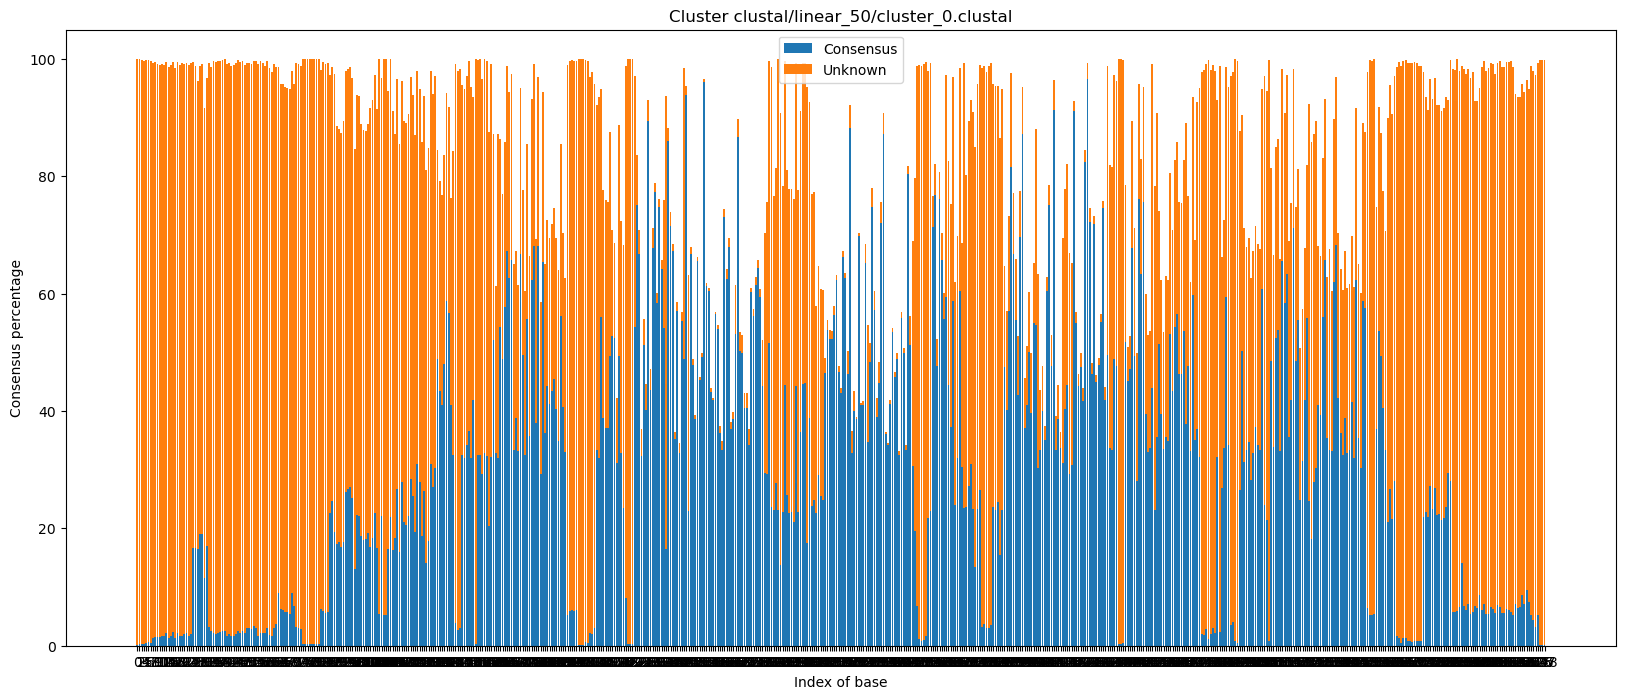

Plot for cluster 1


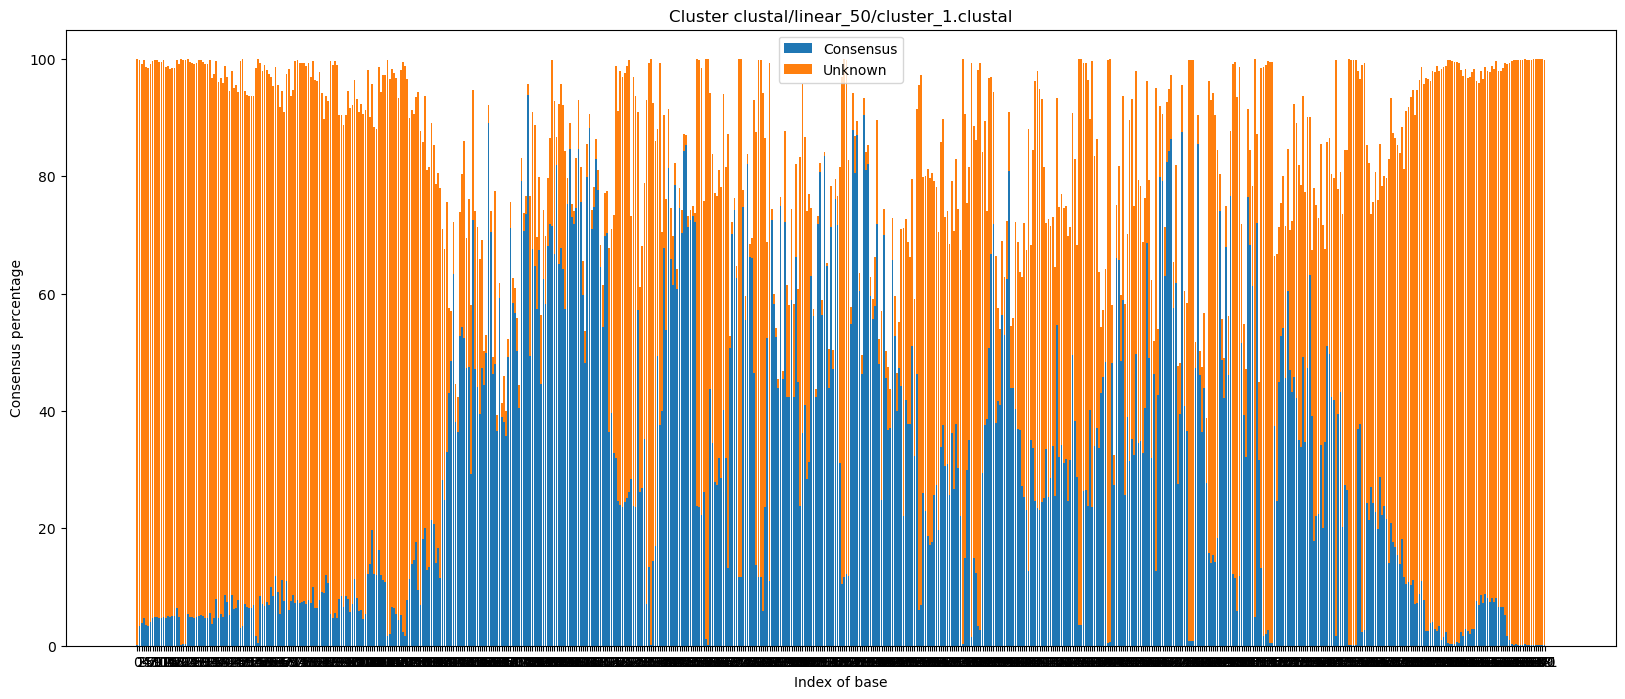

Plot for cluster 2


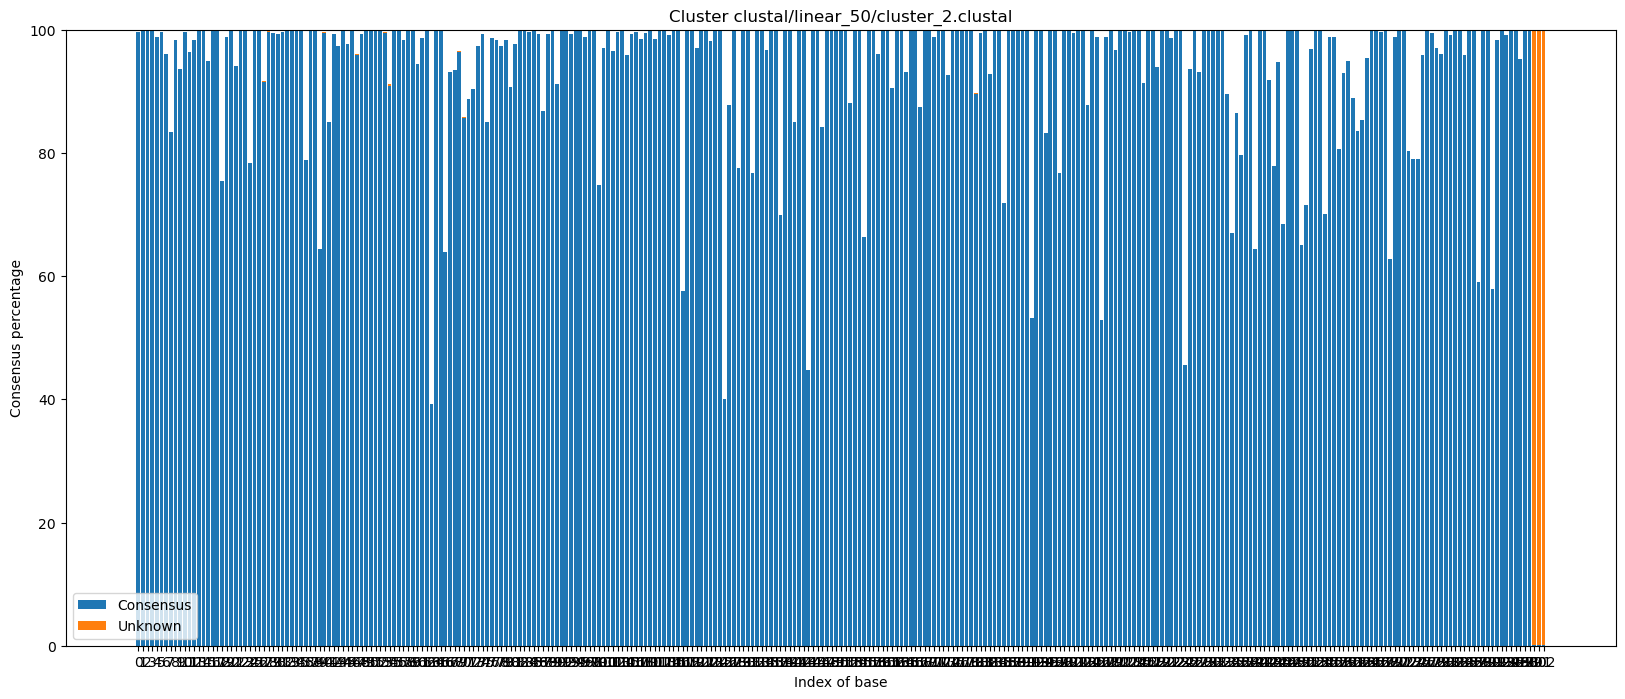

Plot for cluster 3


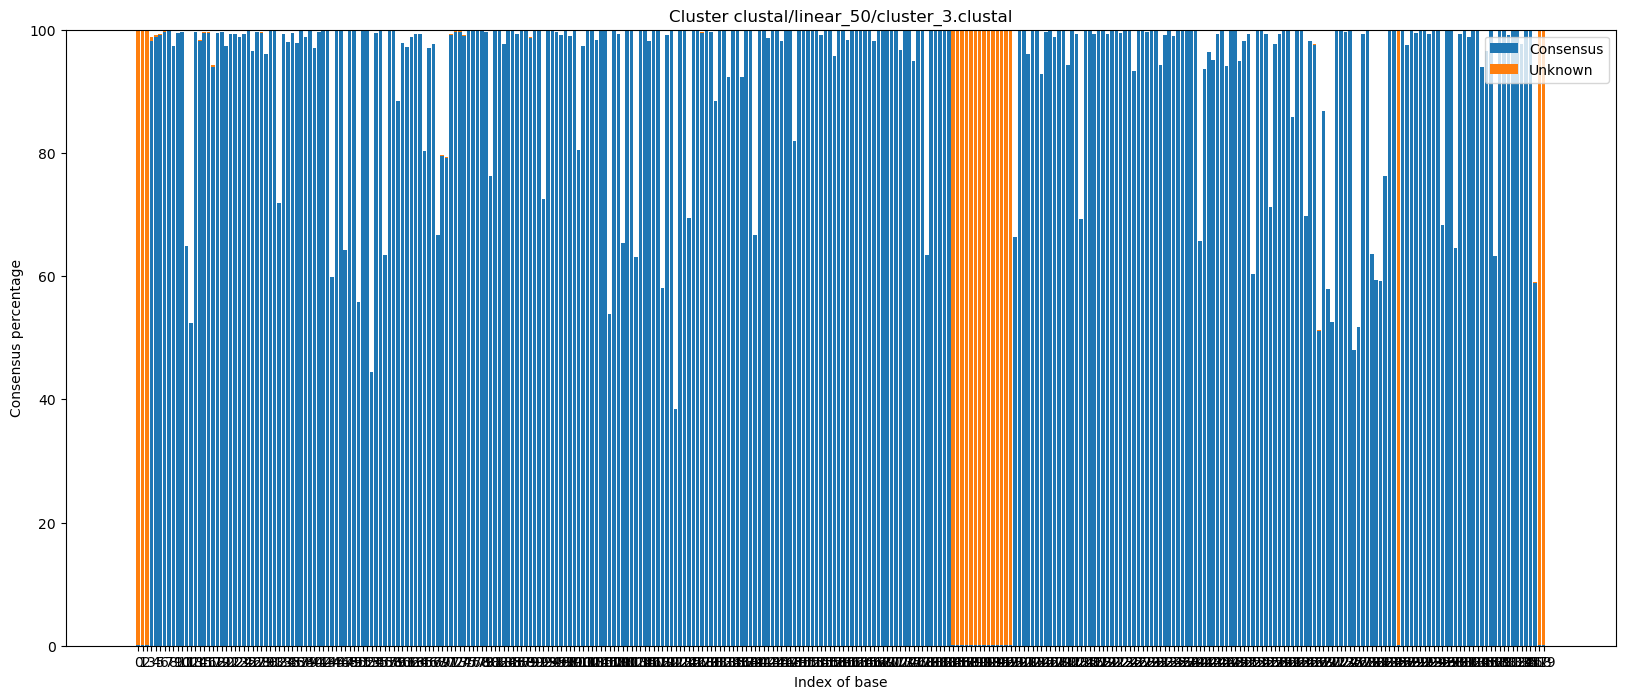

Plot for cluster 4


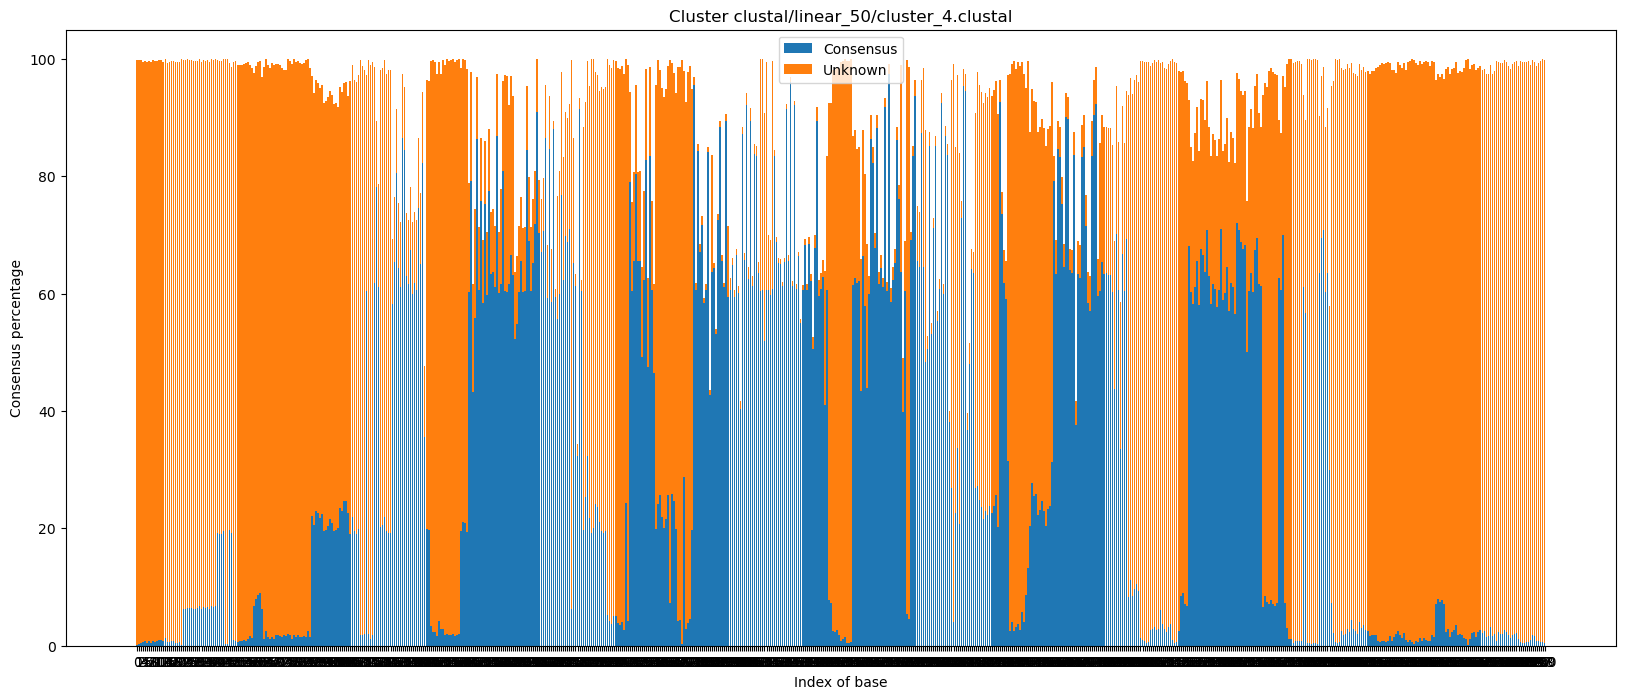

Plot for cluster 5


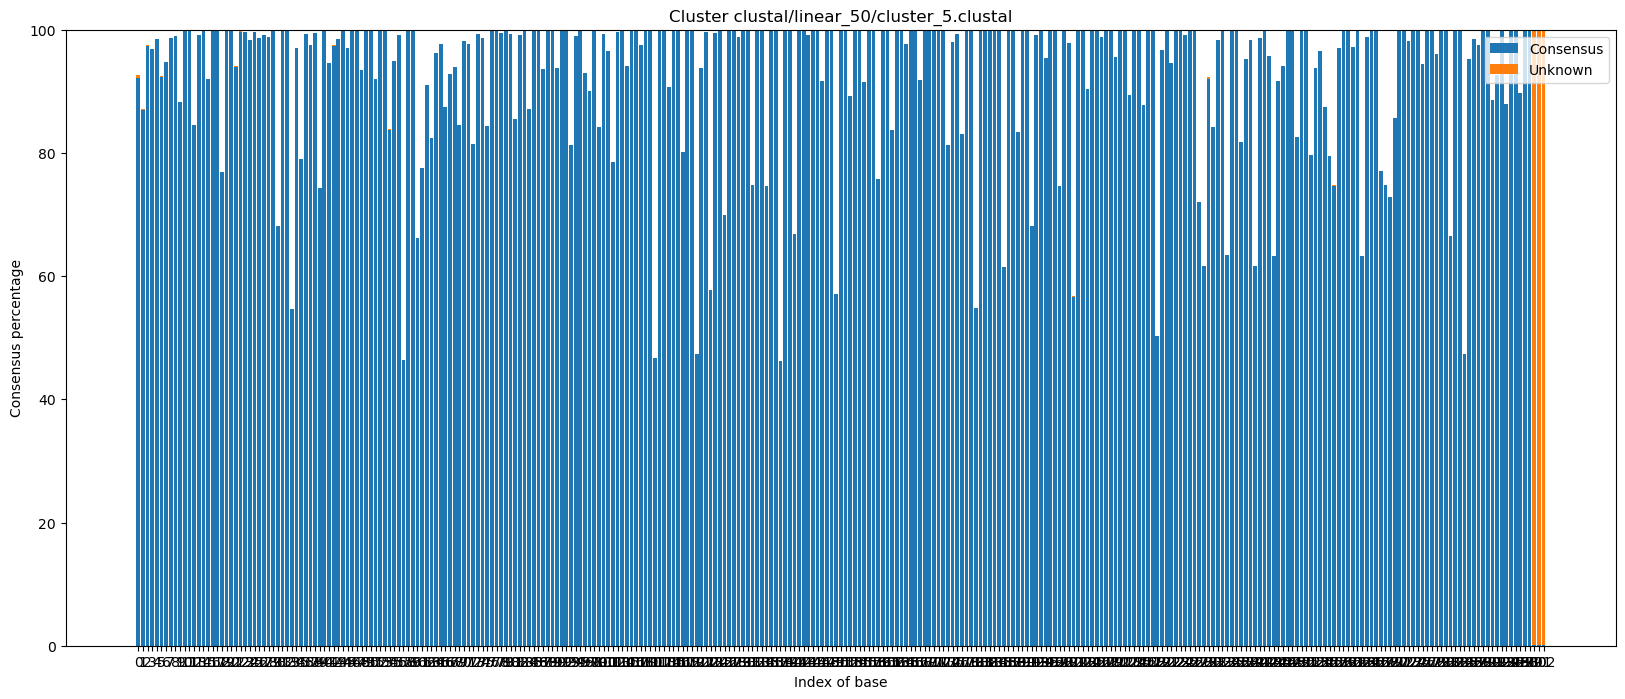

Plot for cluster 6


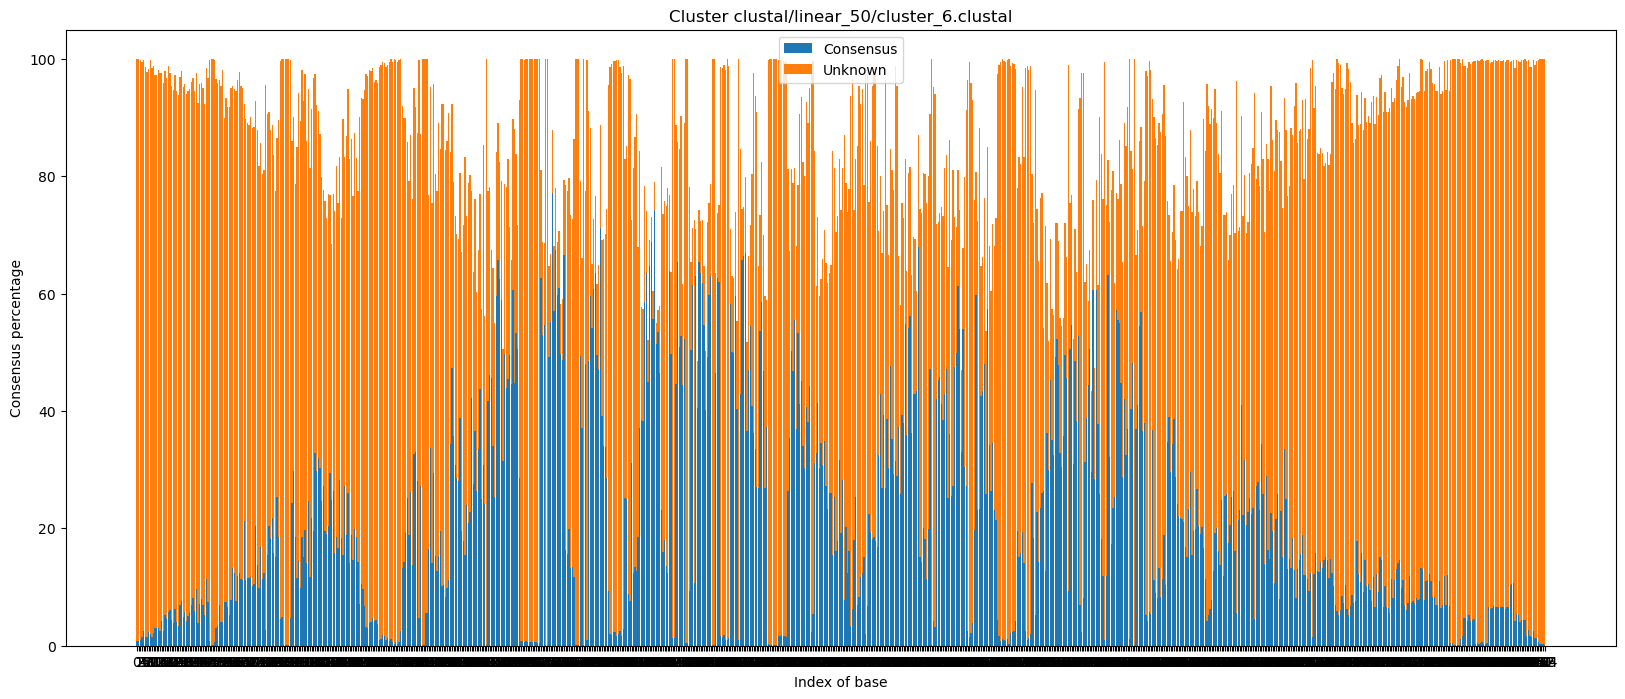

Plot for cluster 7


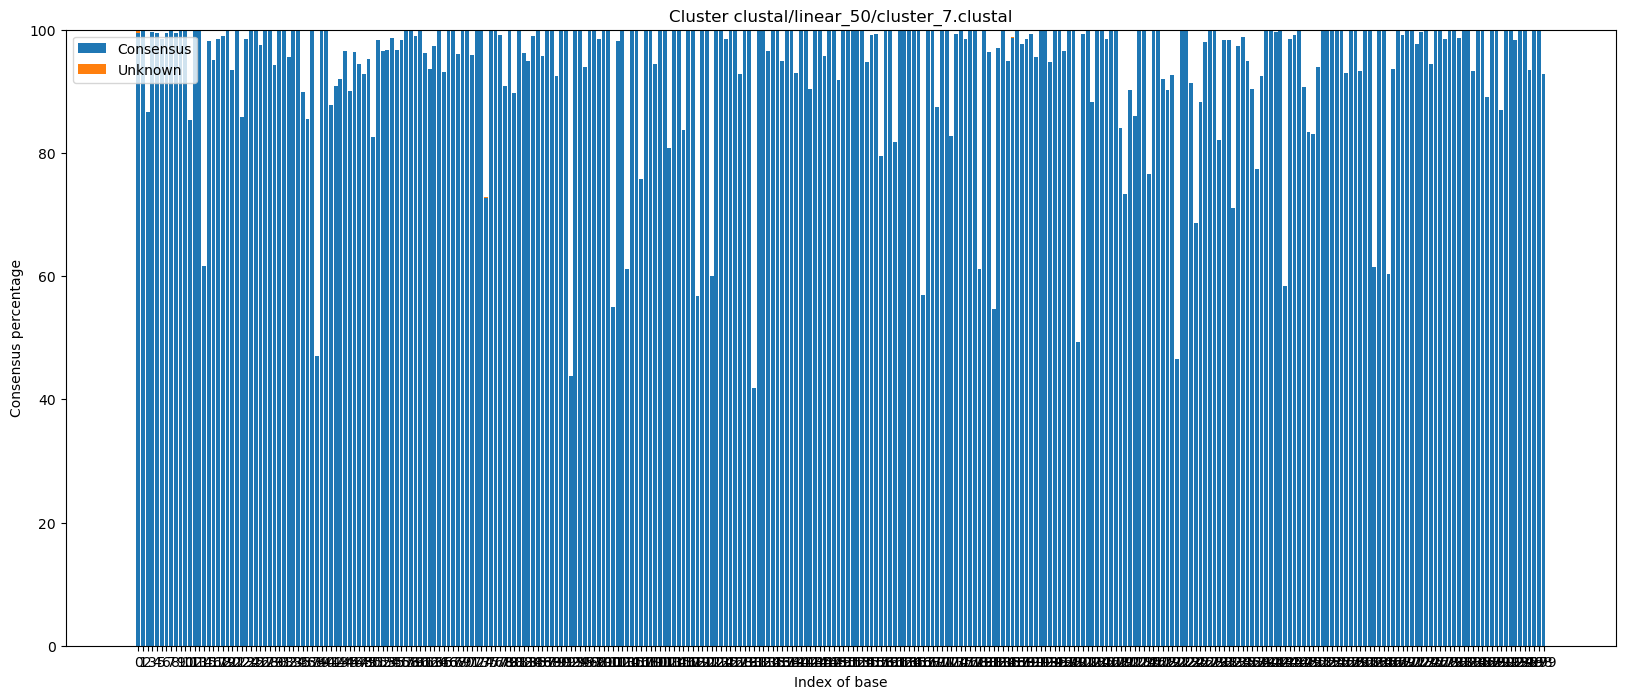

Plot for cluster 8


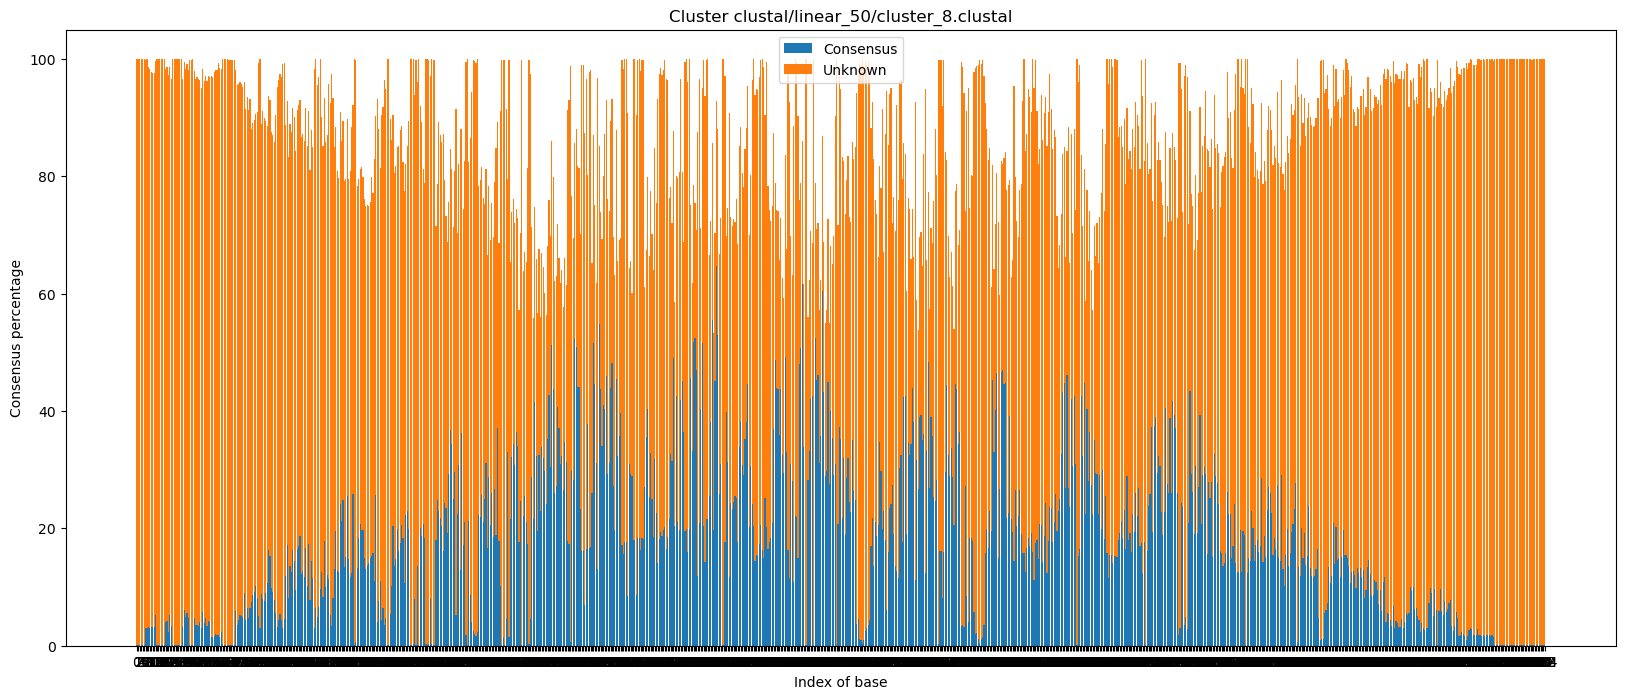

Plot for cluster 9


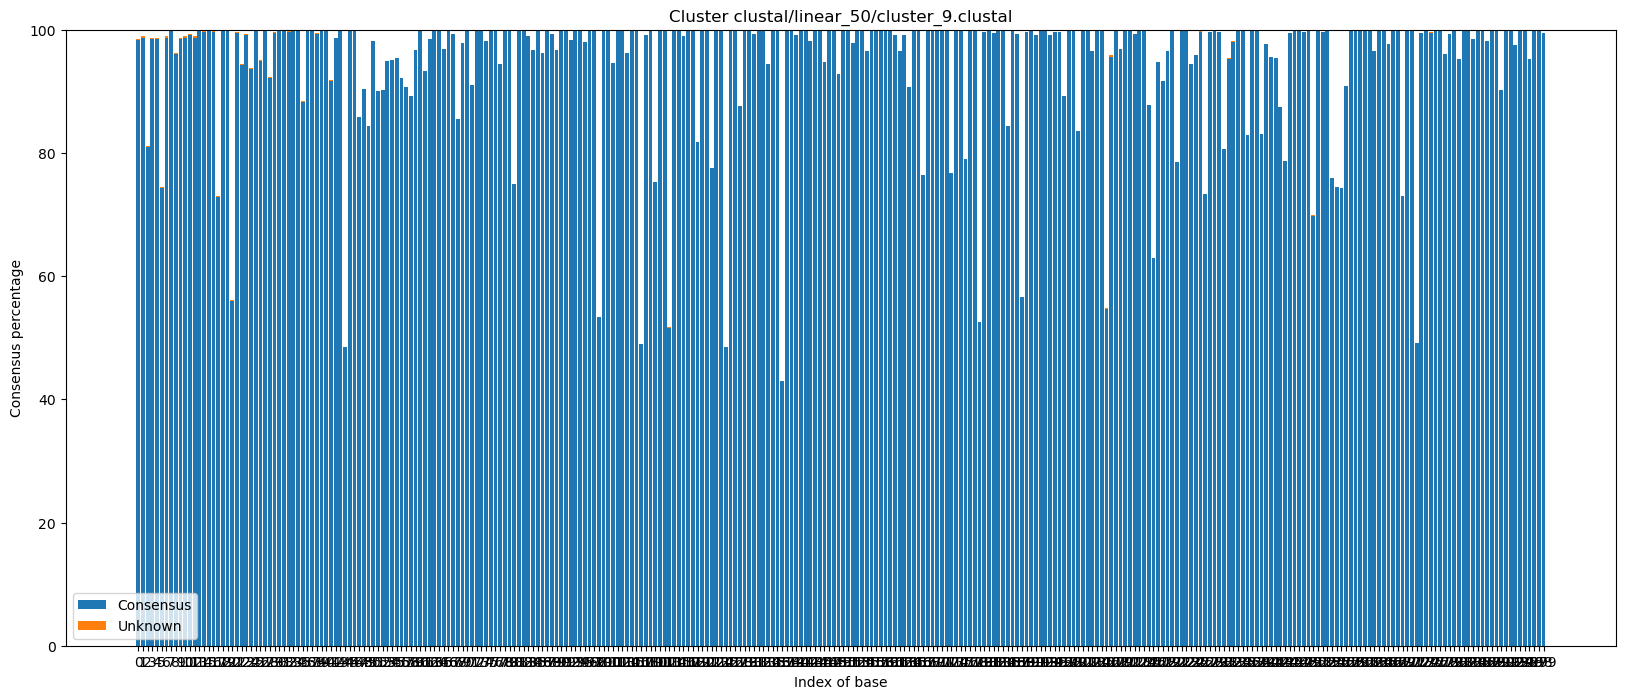

Plot for cluster 10


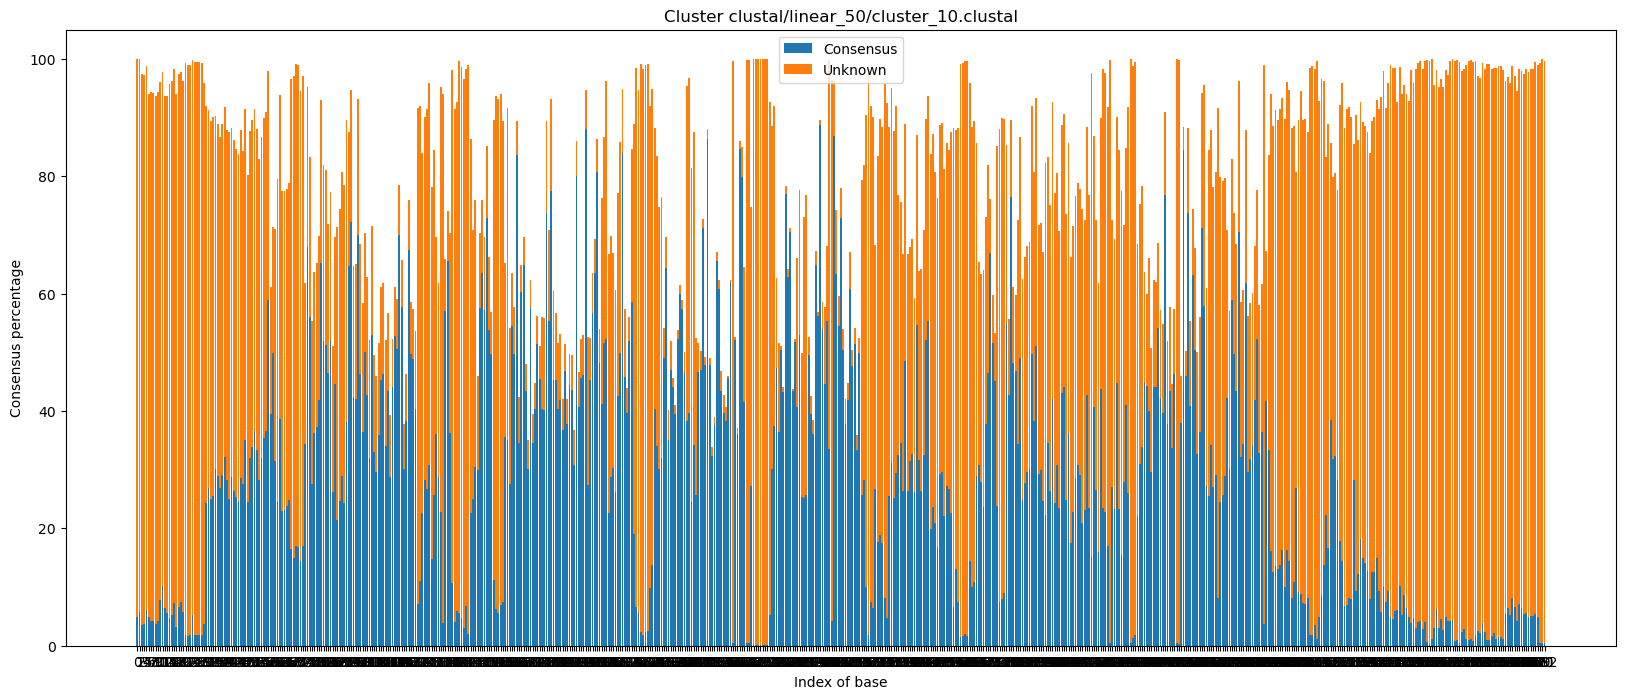

Plot for cluster 11


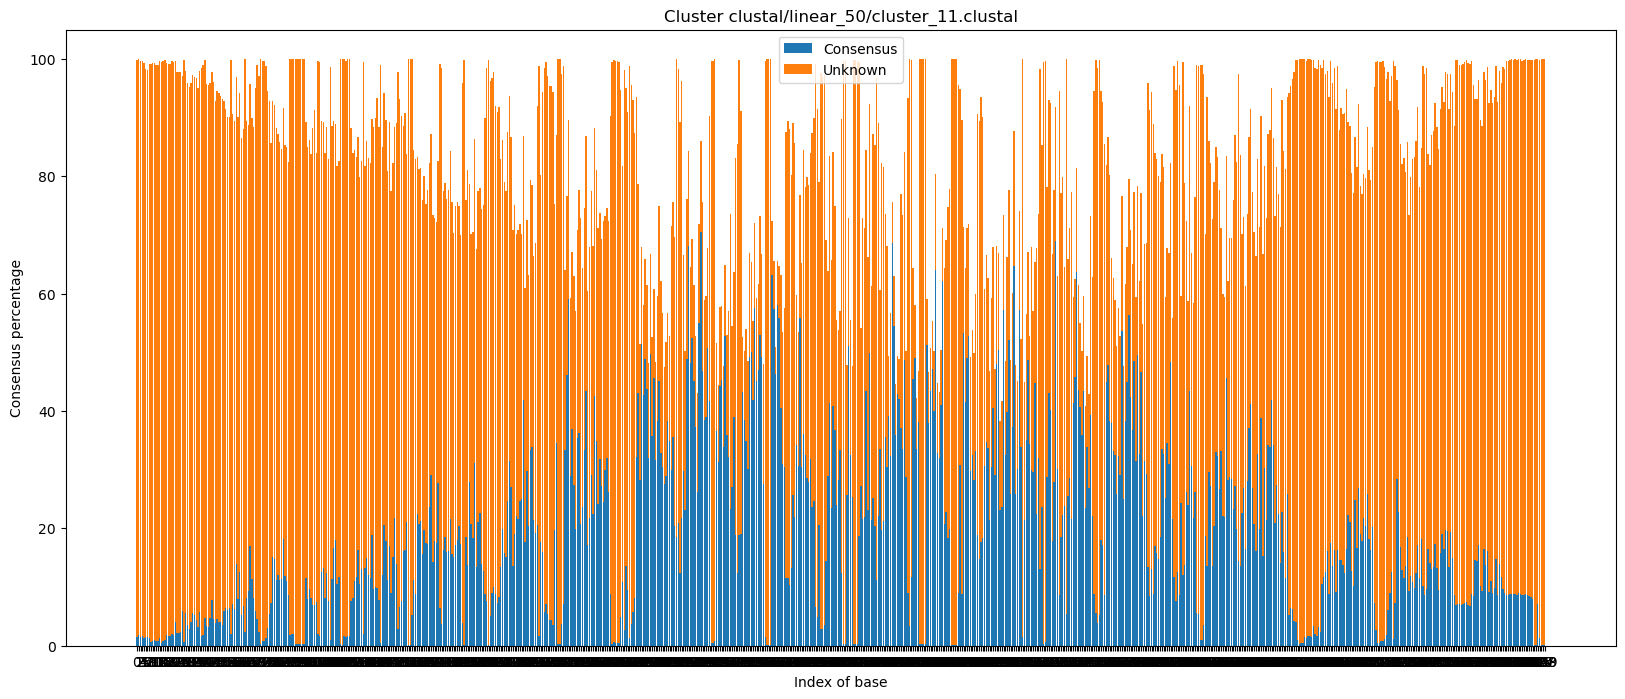

Plot for cluster 12


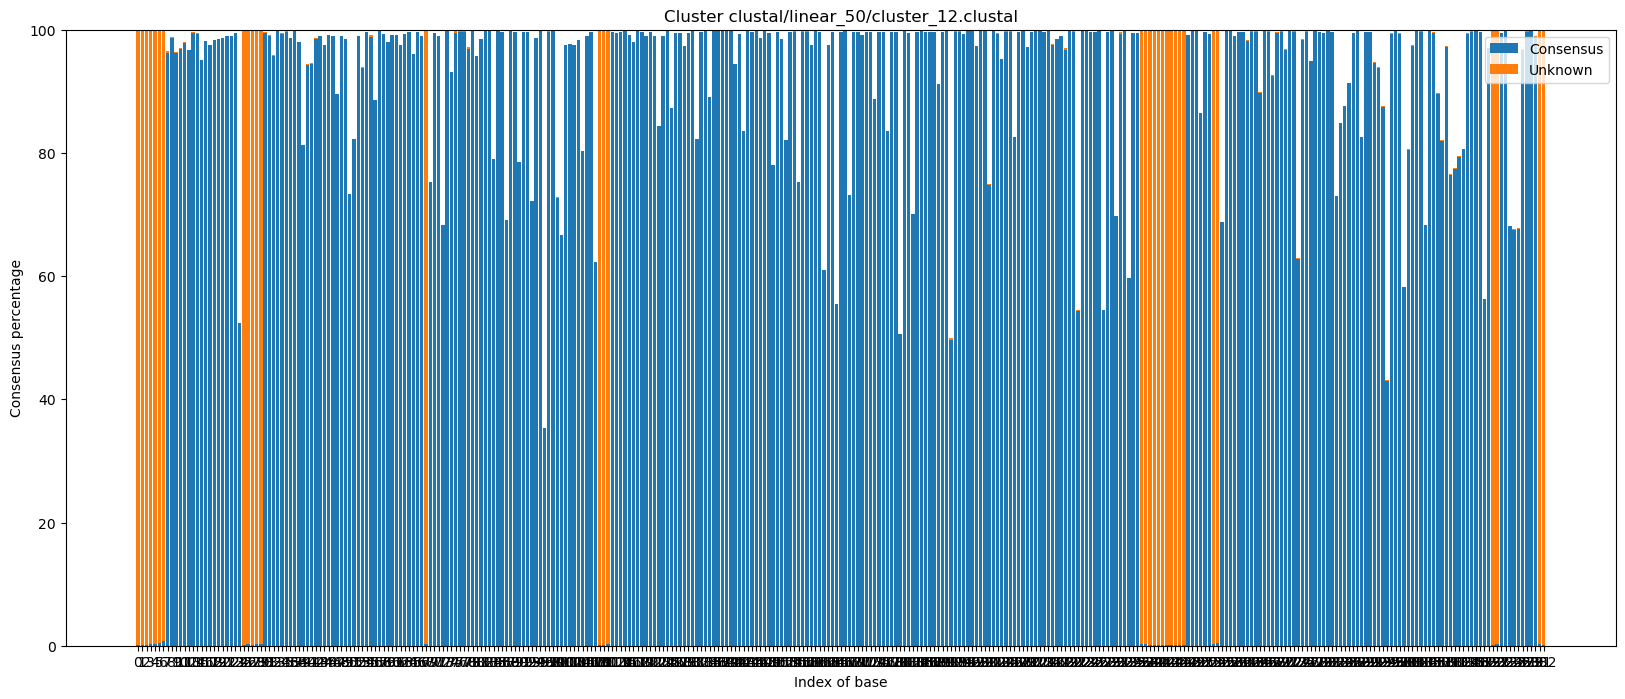

Plot for cluster 13


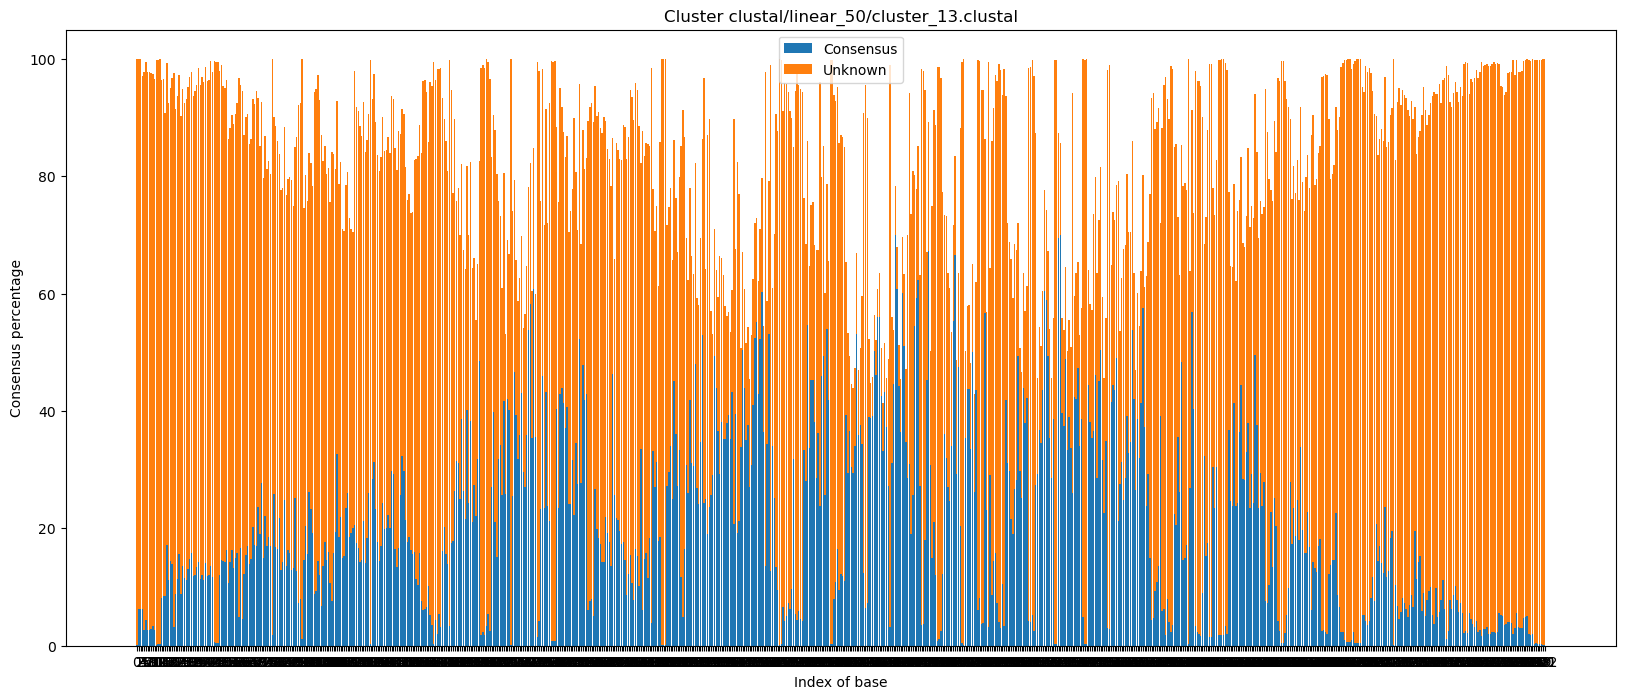

Plot for cluster 14


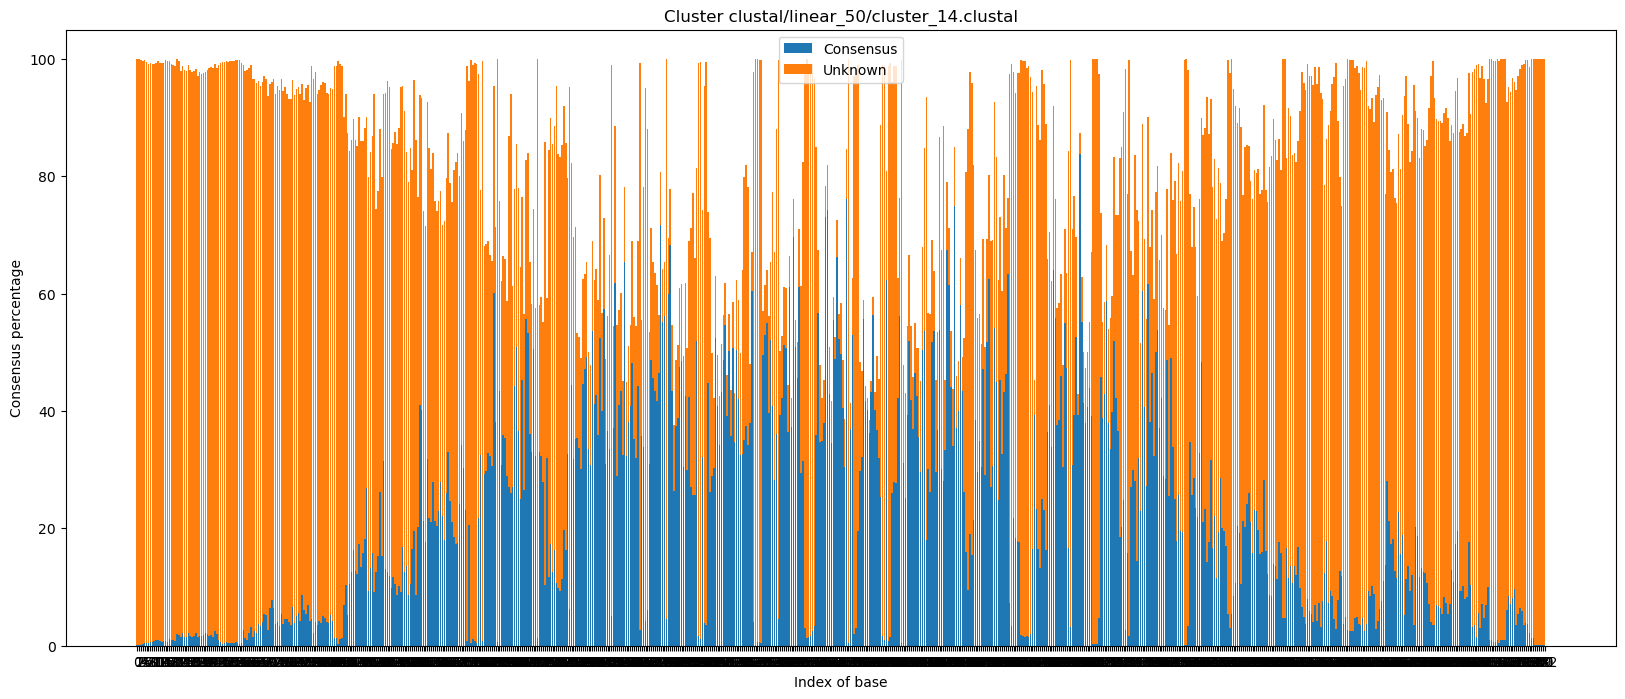

Plot for cluster 15


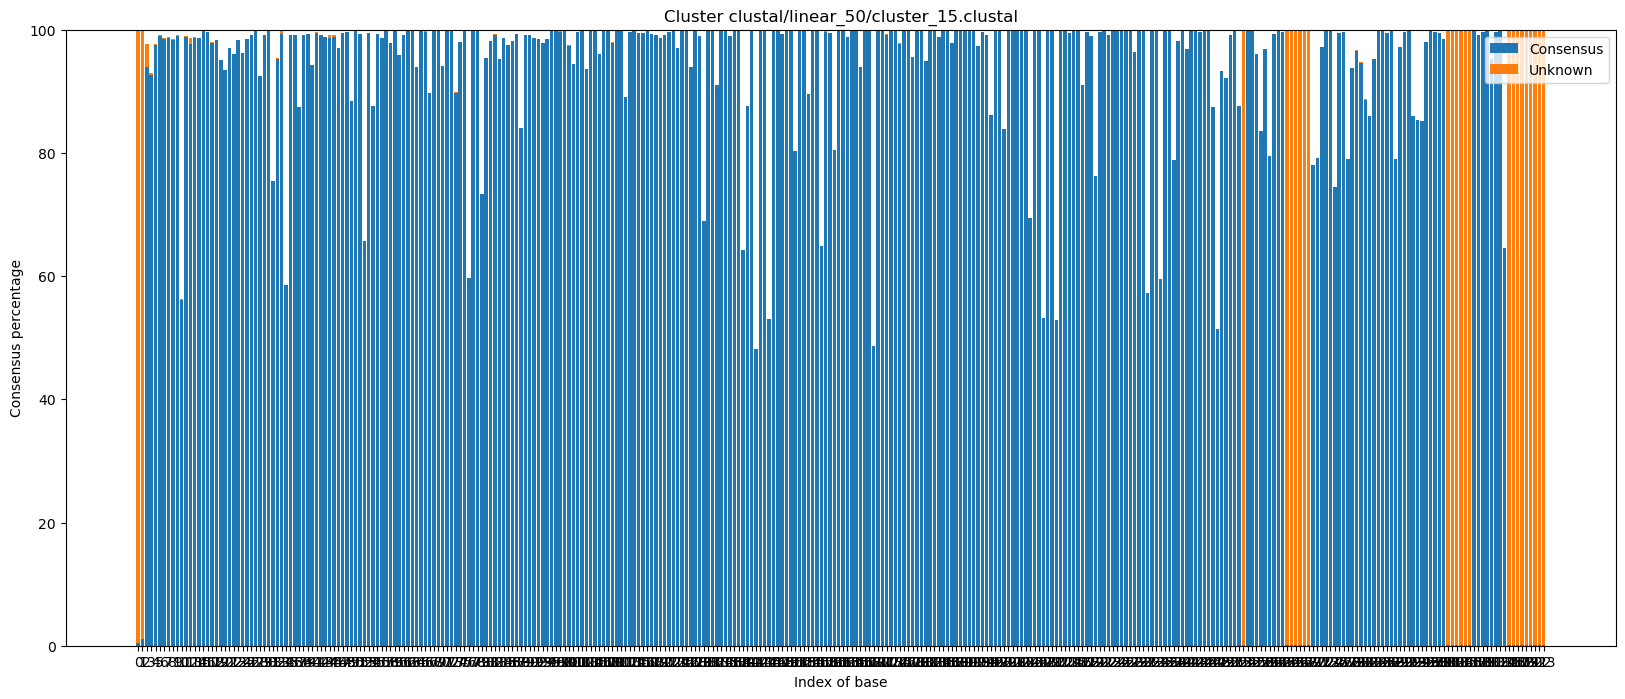

Plot for cluster 16


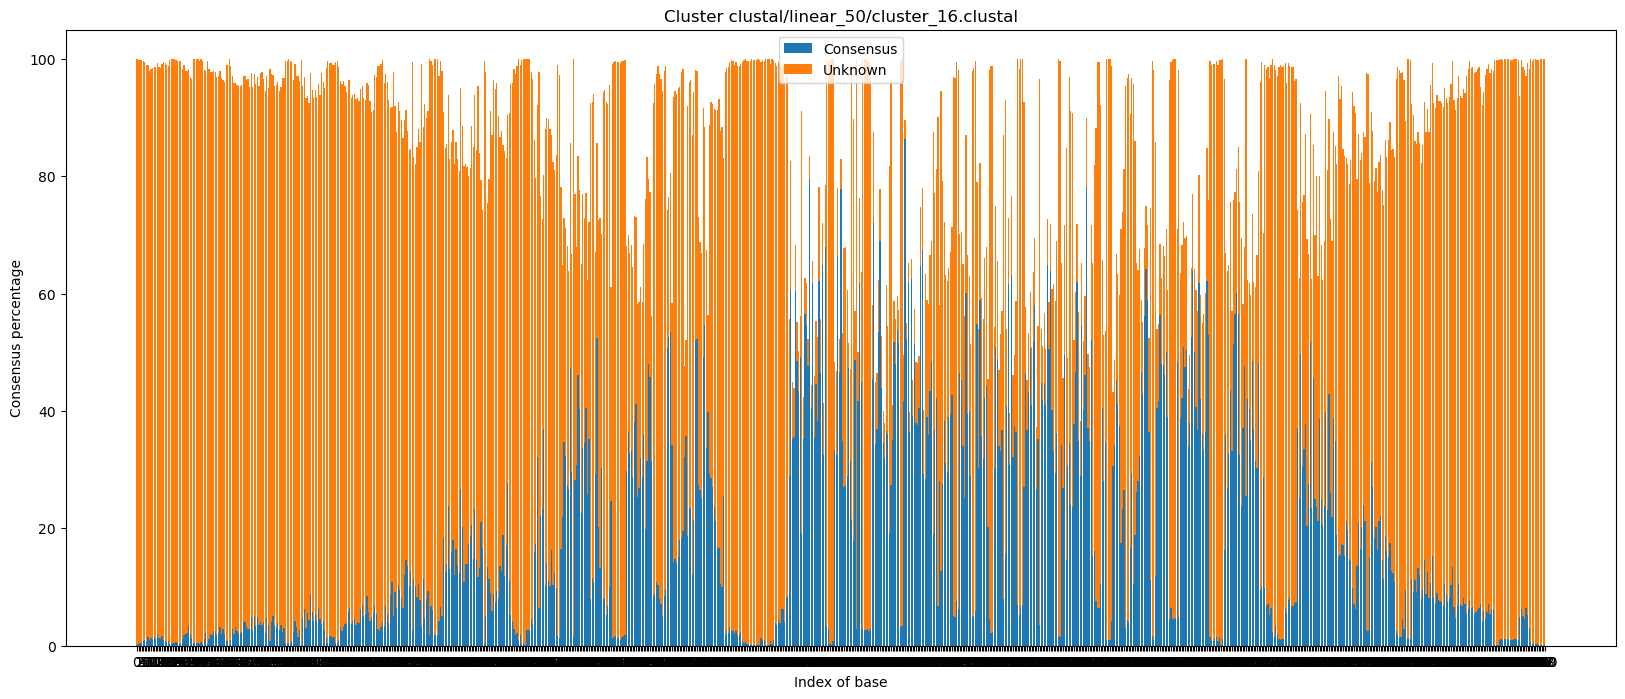

Plot for cluster 17


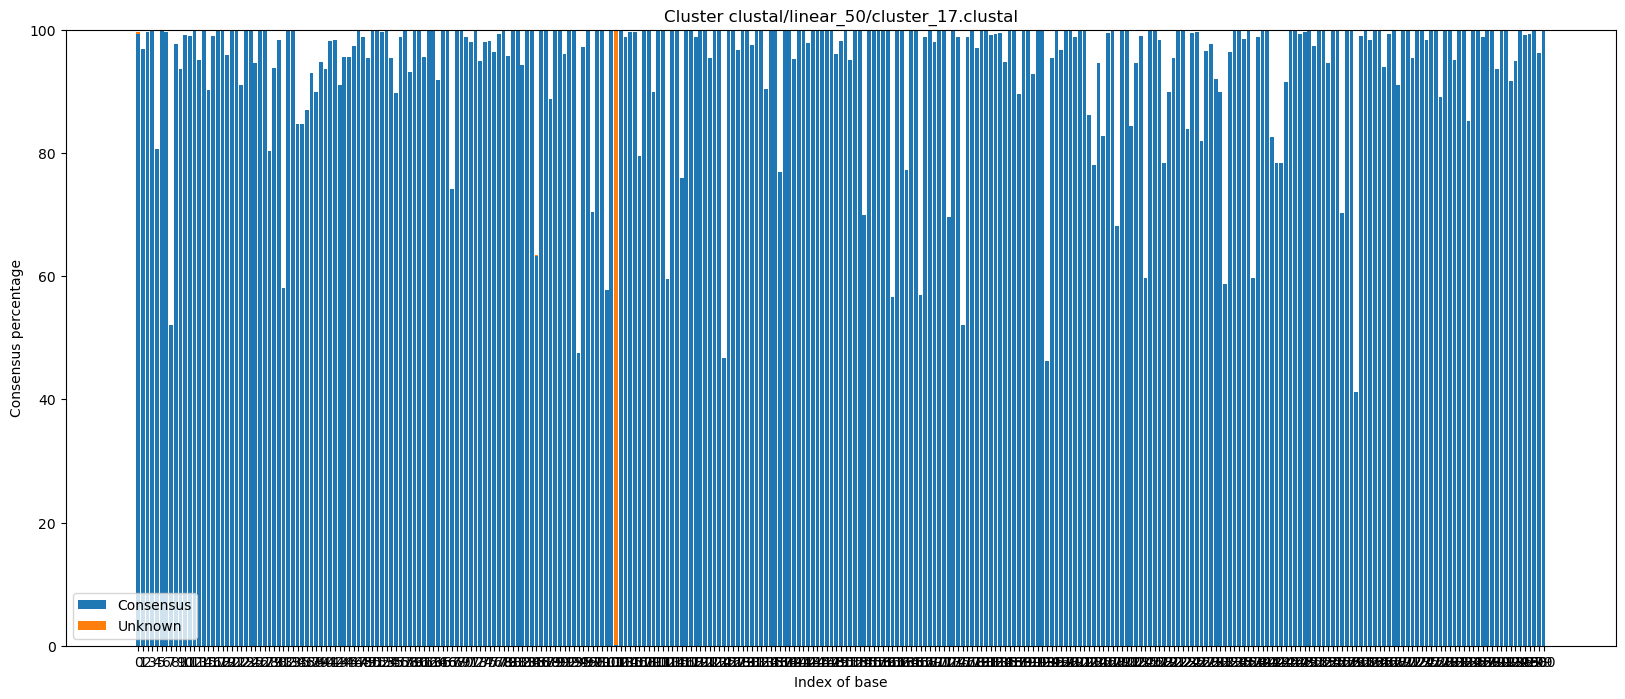

Plot for cluster 18


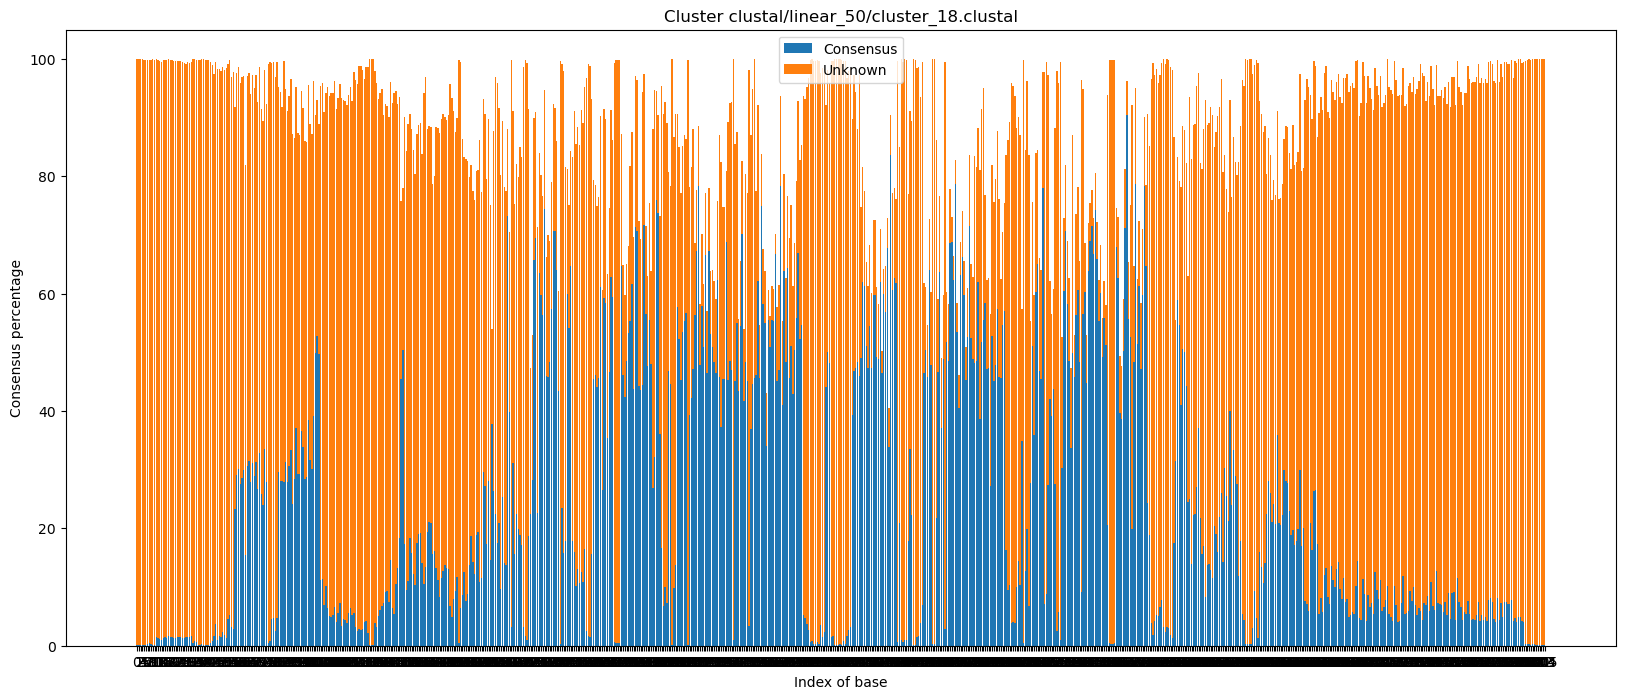

Plot for cluster 19


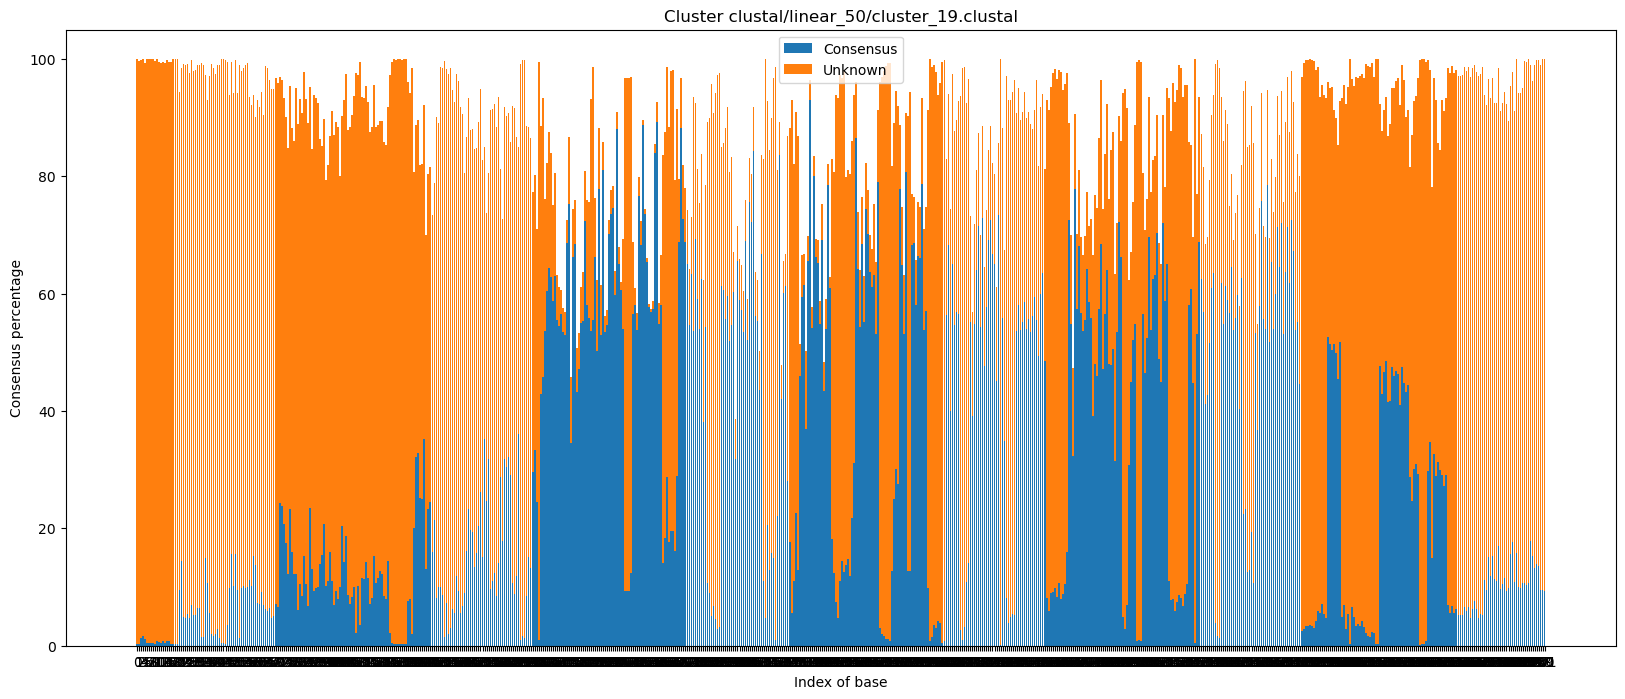

Plot for cluster 20


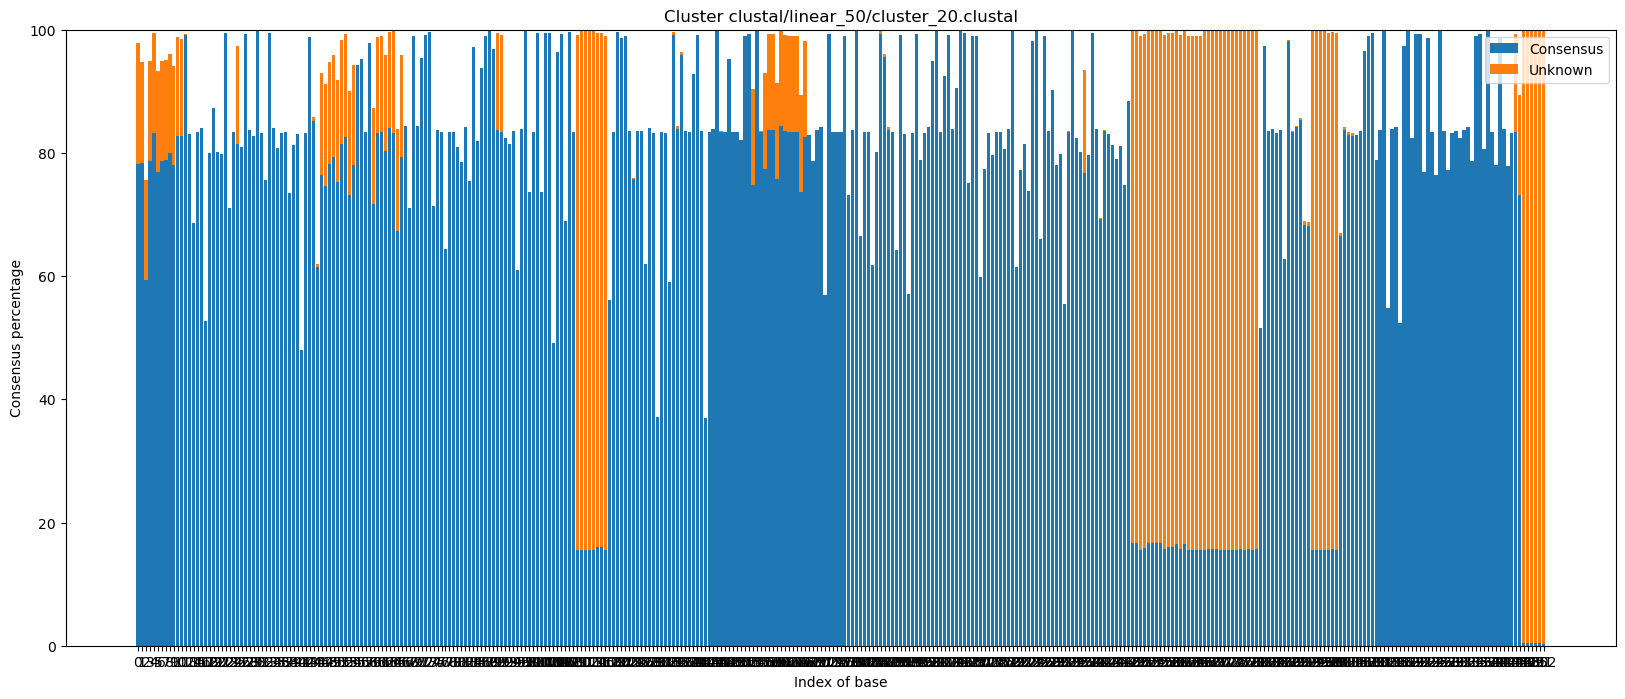

Plot for cluster 21


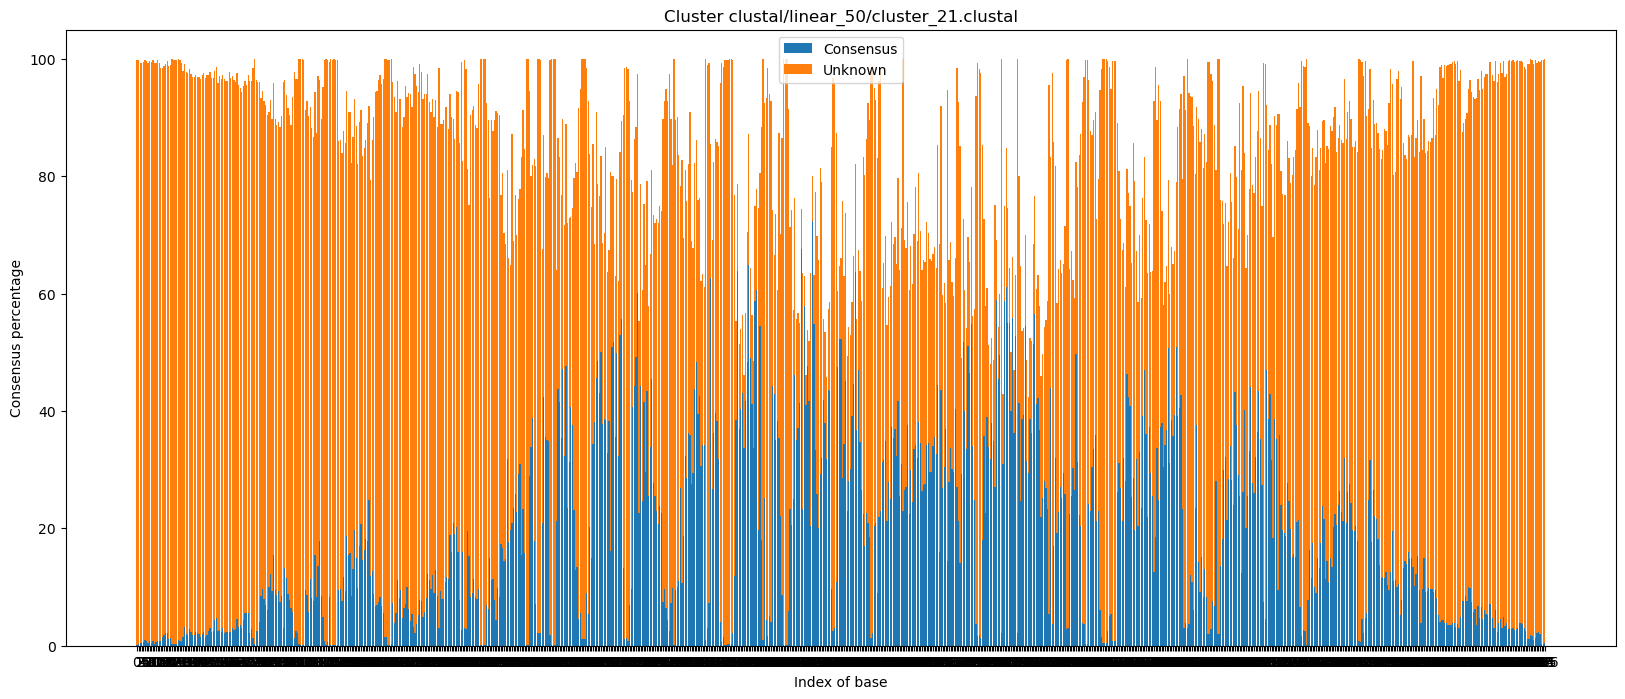

Plot for cluster 22


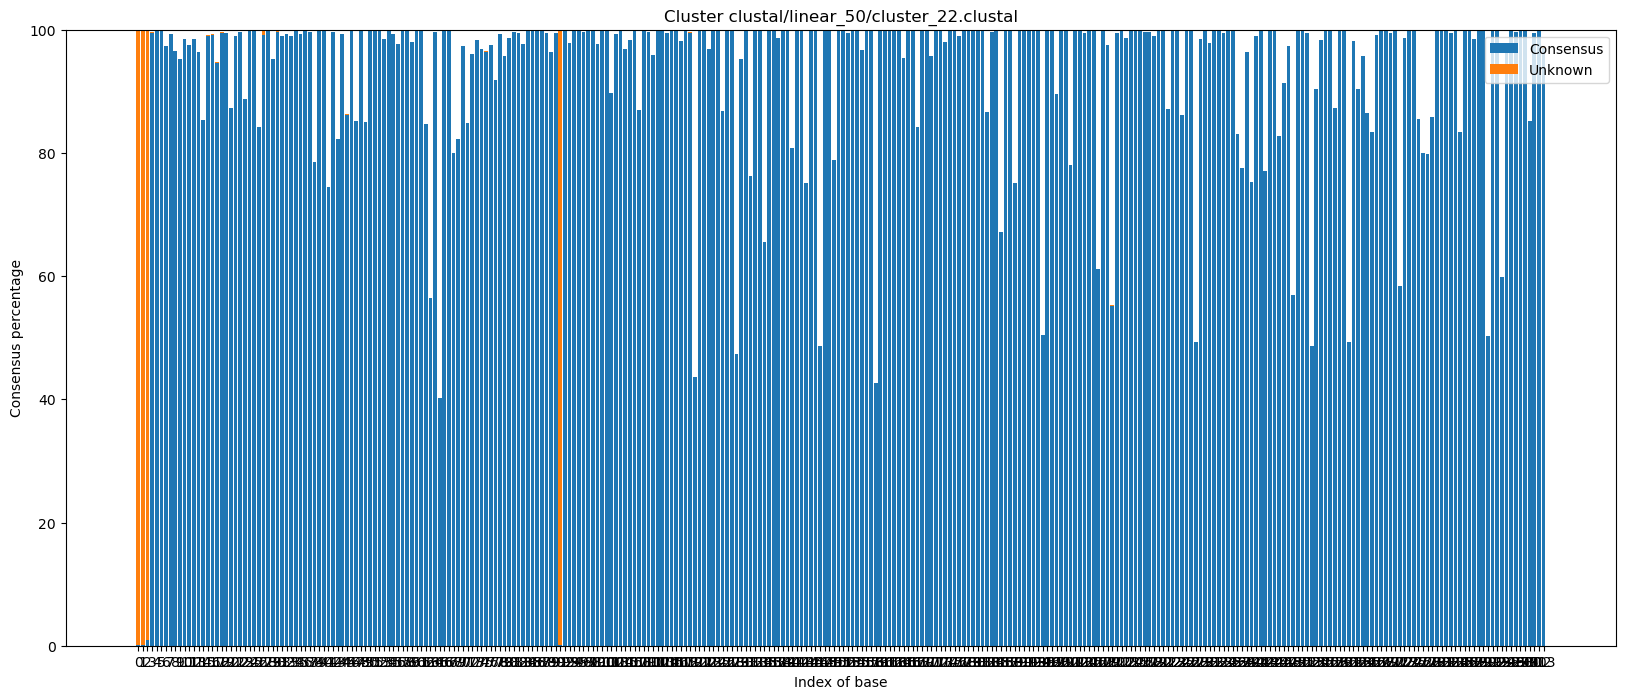

Plot for cluster 23


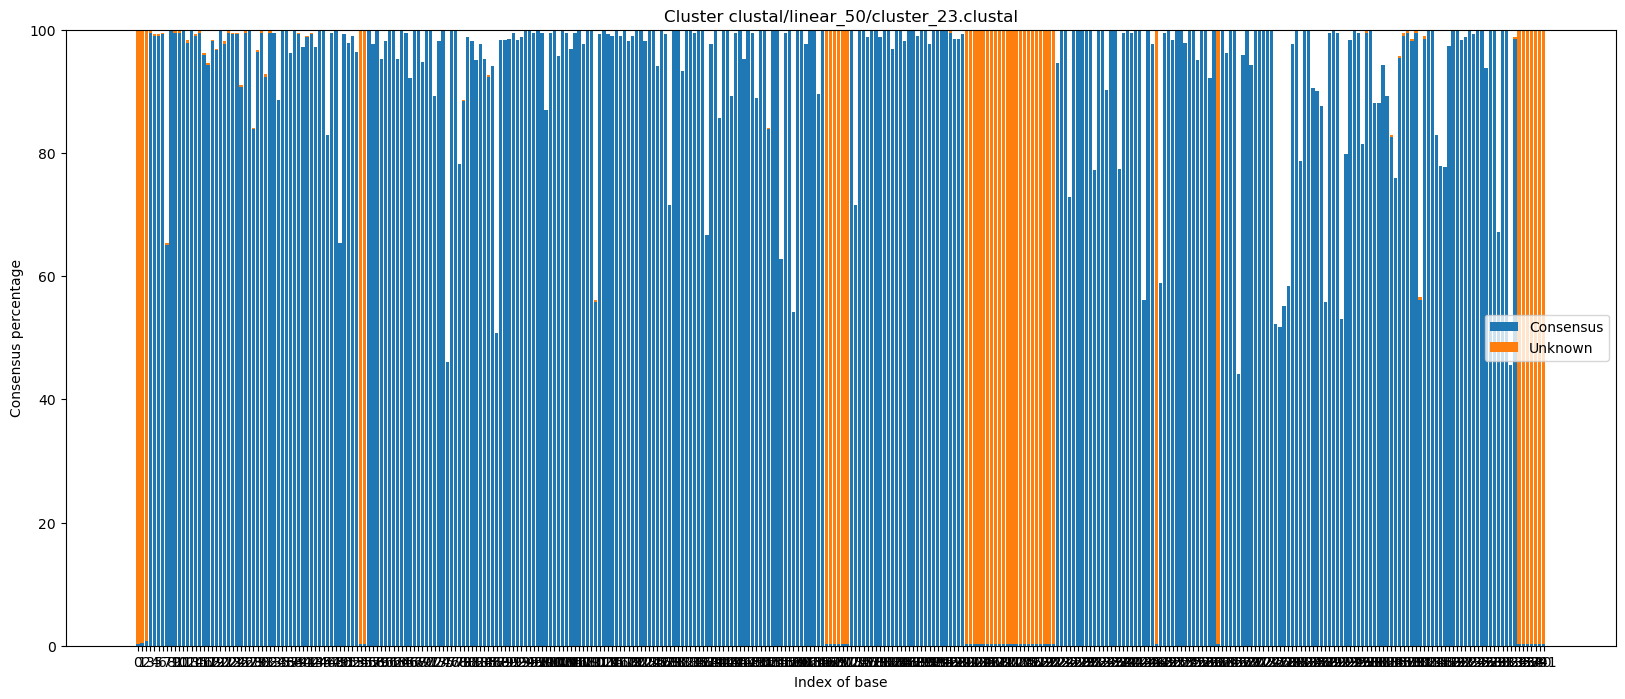

Plot for cluster 24


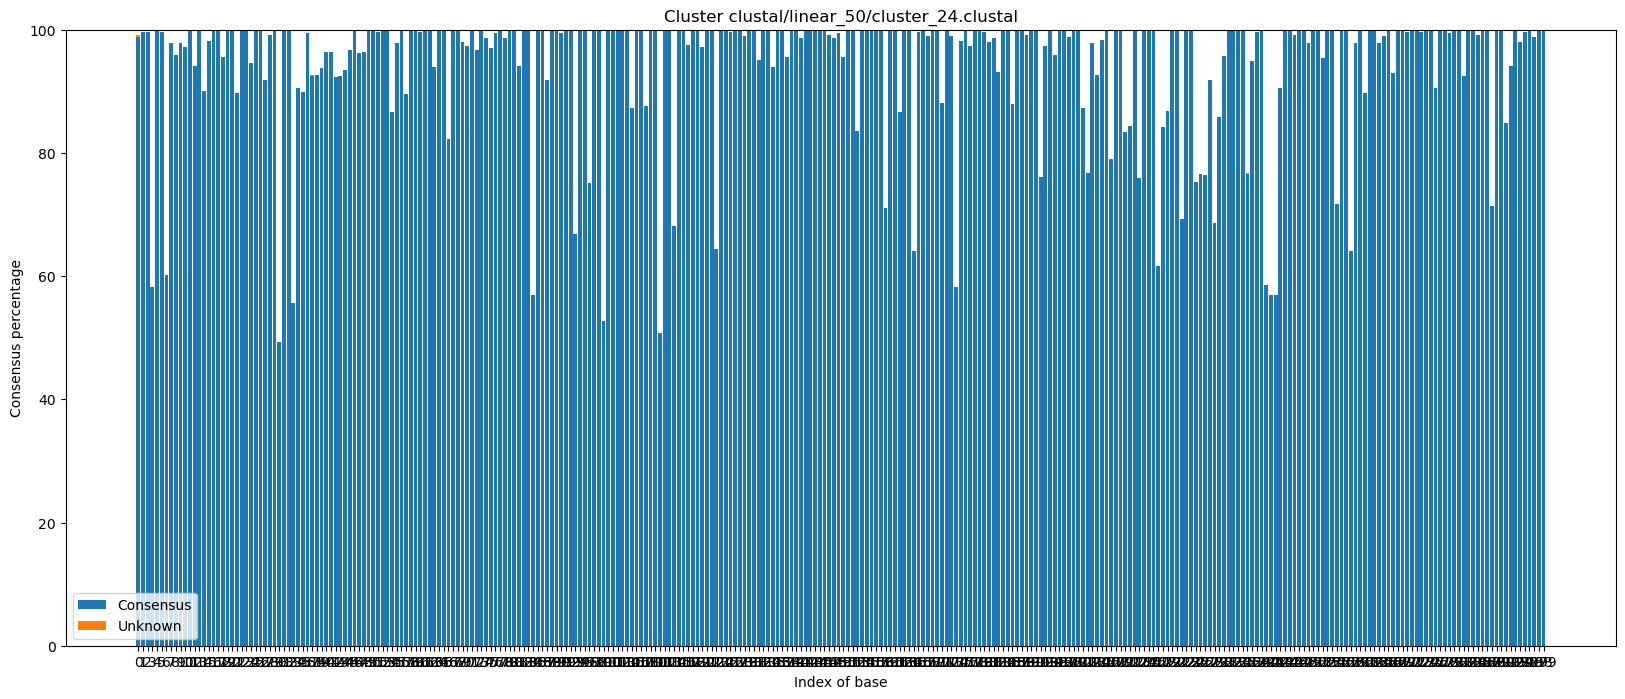

Plot for cluster 25


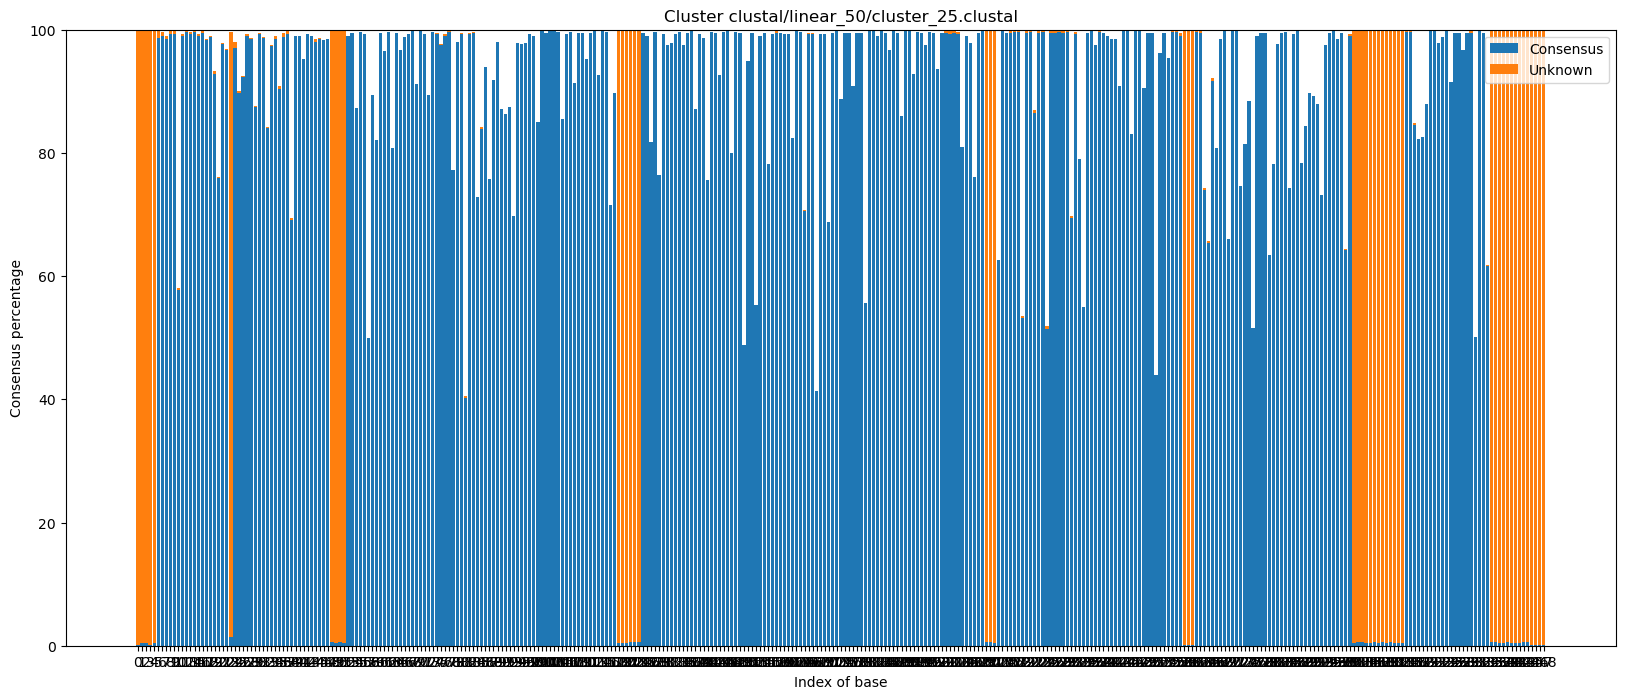

Plot for cluster 26


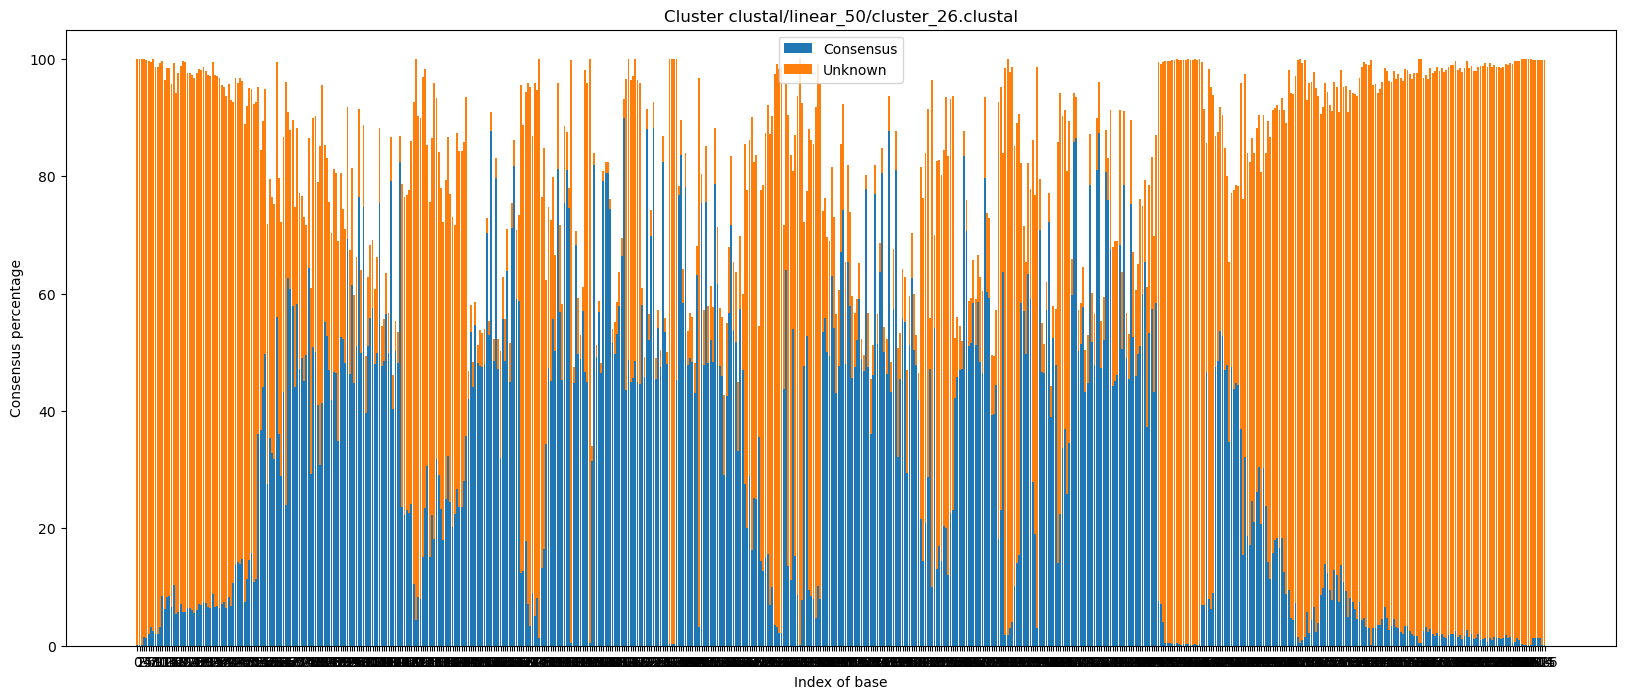

Plot for cluster 27


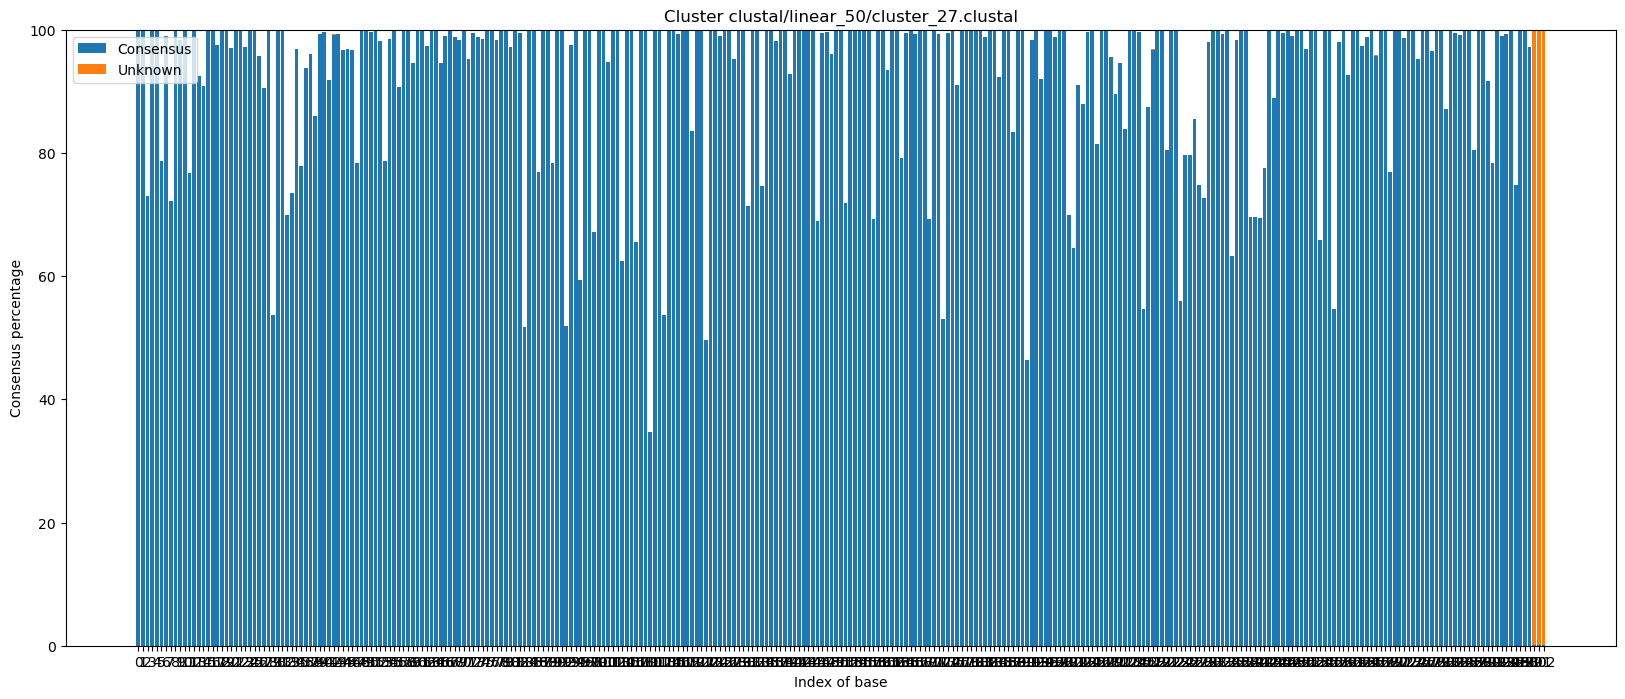

Plot for cluster 28


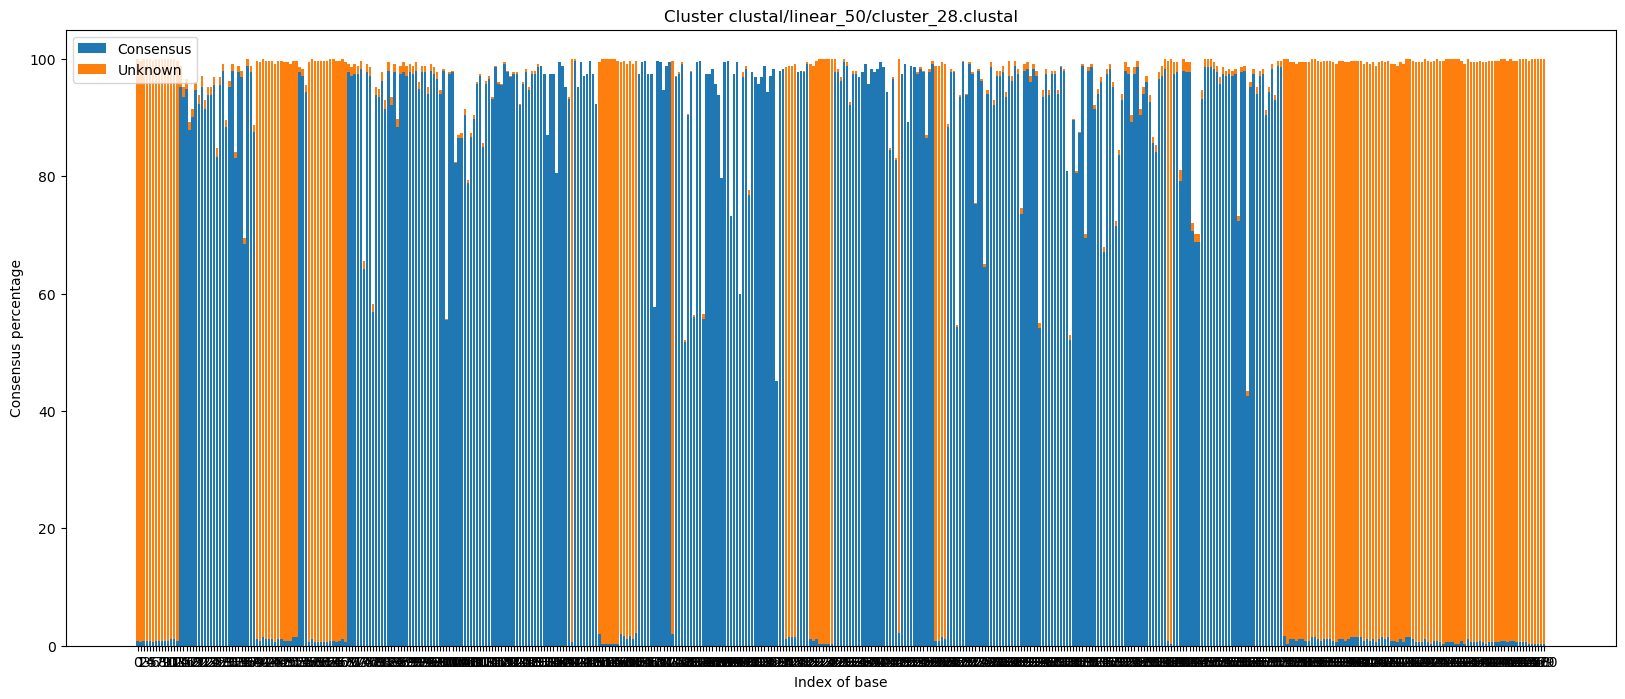

Plot for cluster 29


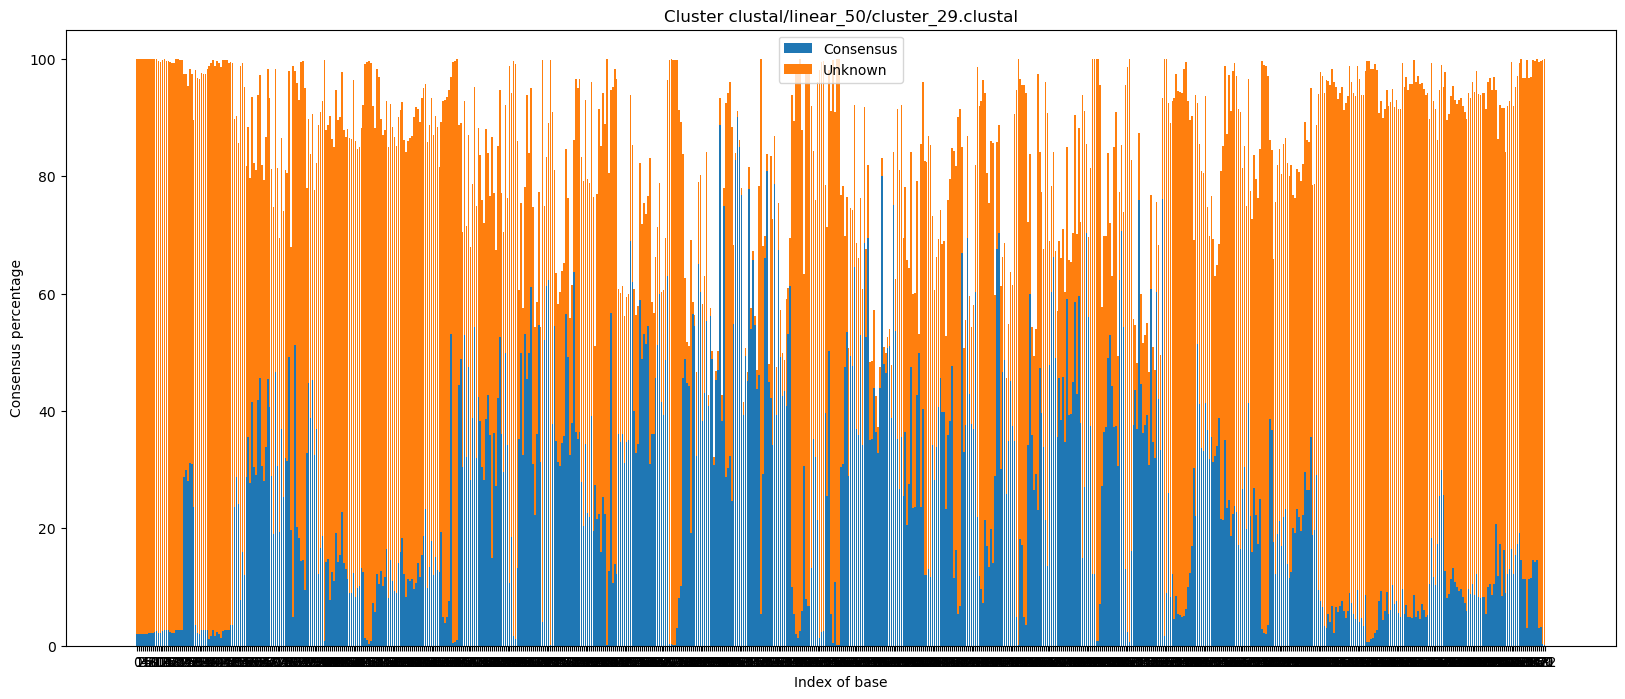

Plot for cluster 30


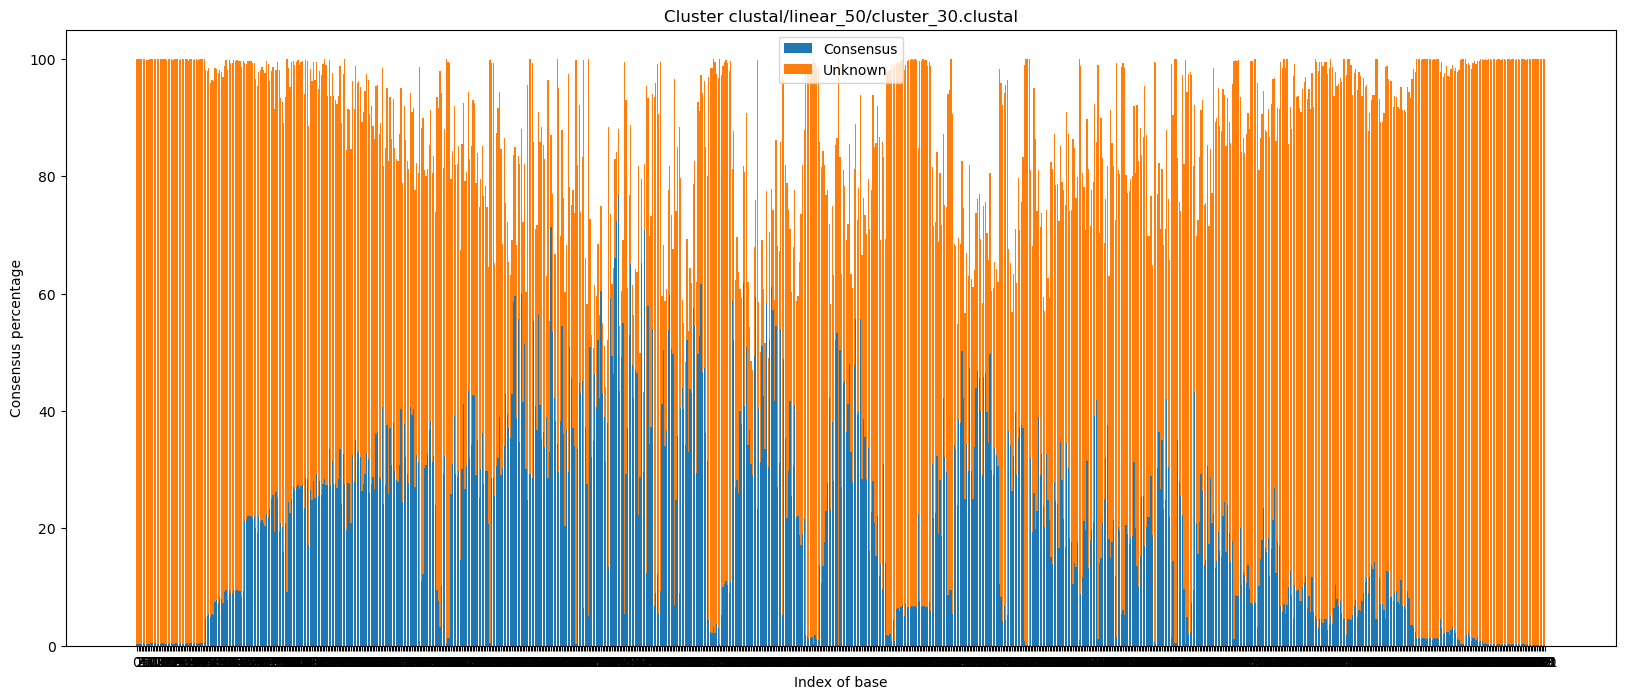

Plot for cluster 31


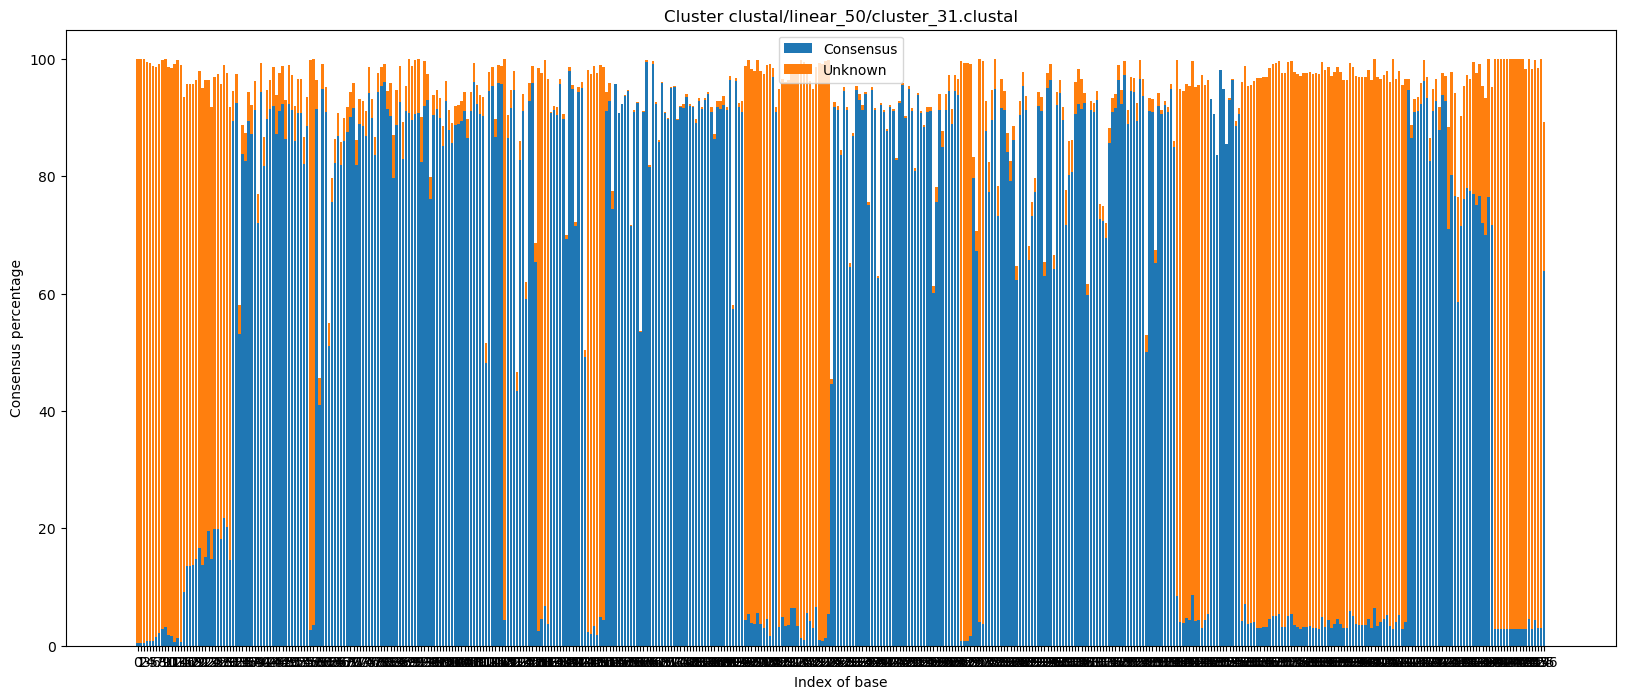

Plot for cluster 32


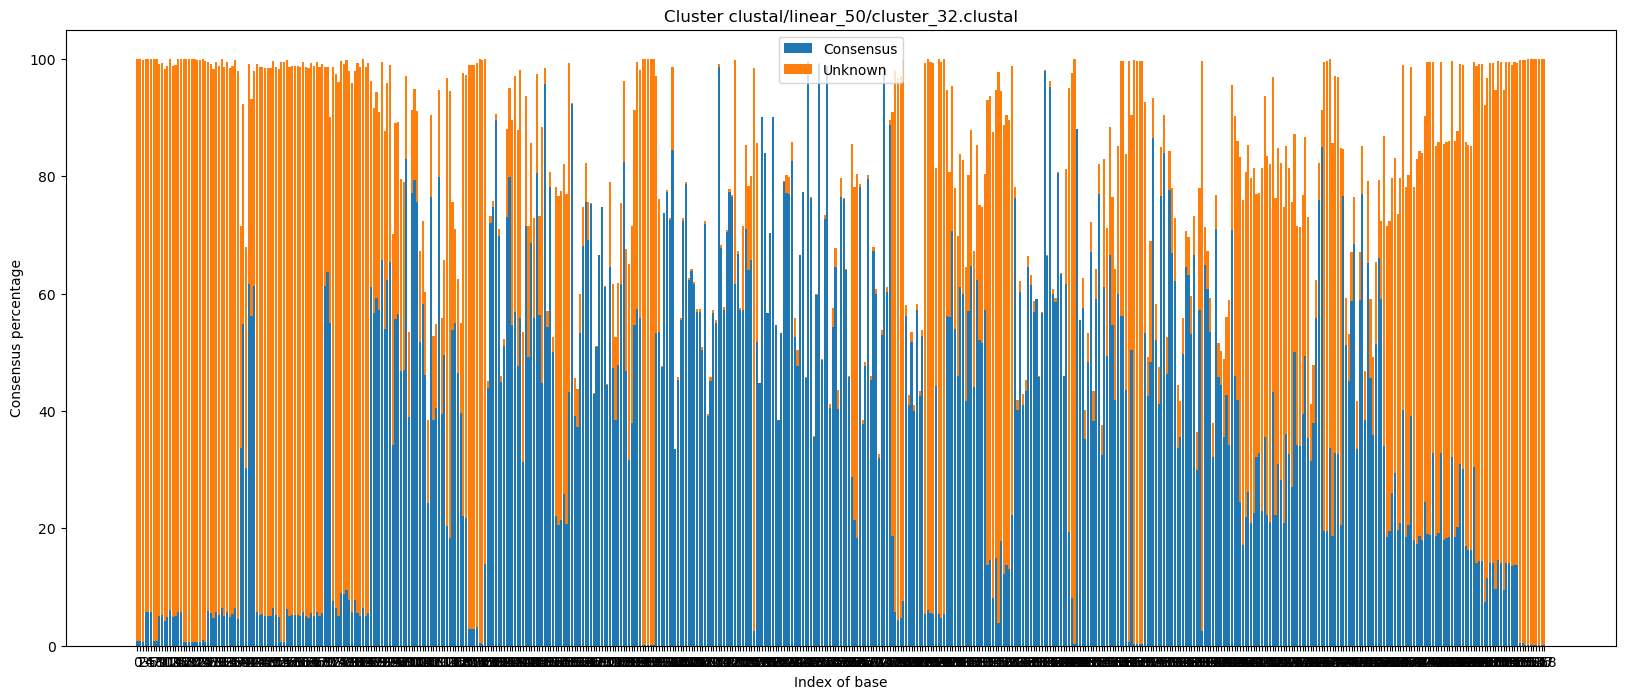

Plot for cluster 33


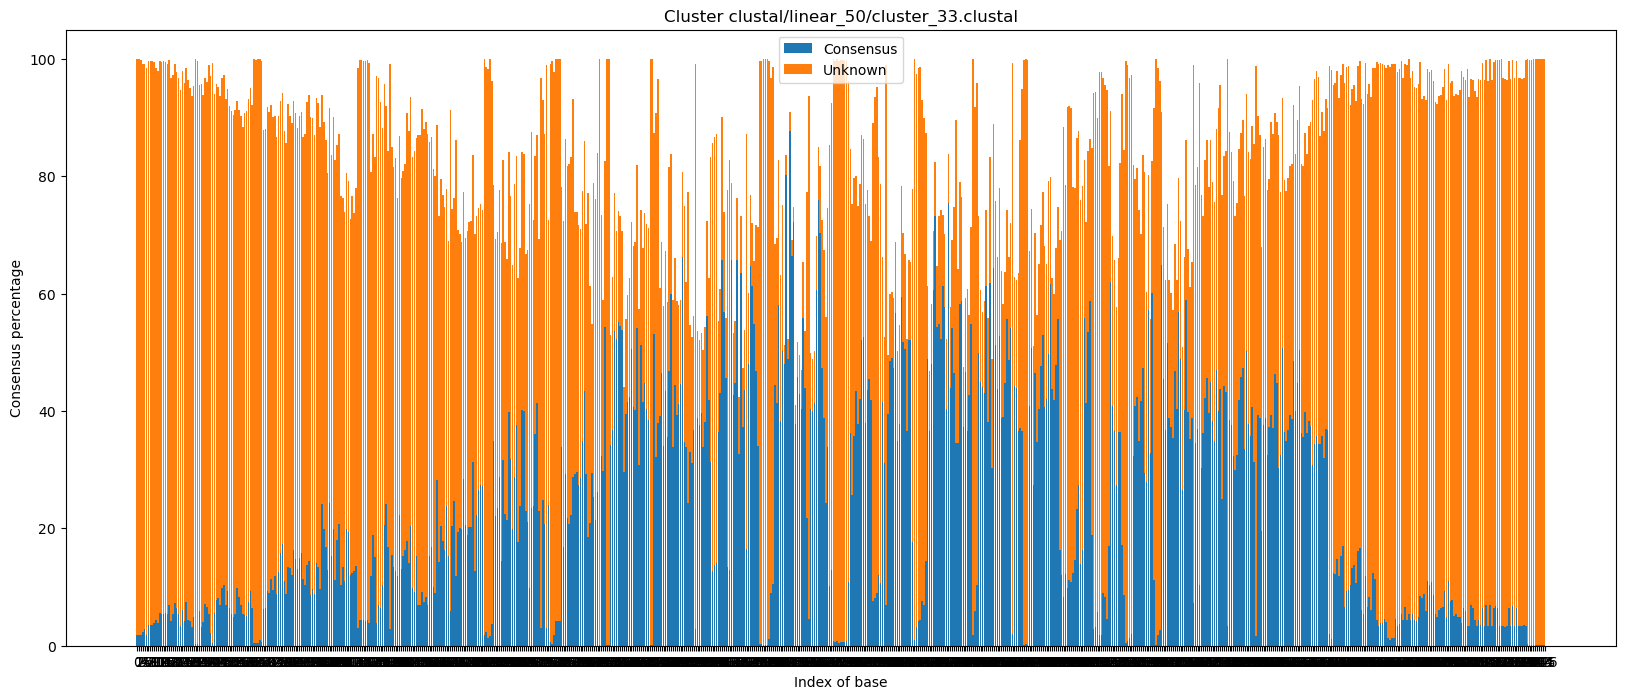

Plot for cluster 34


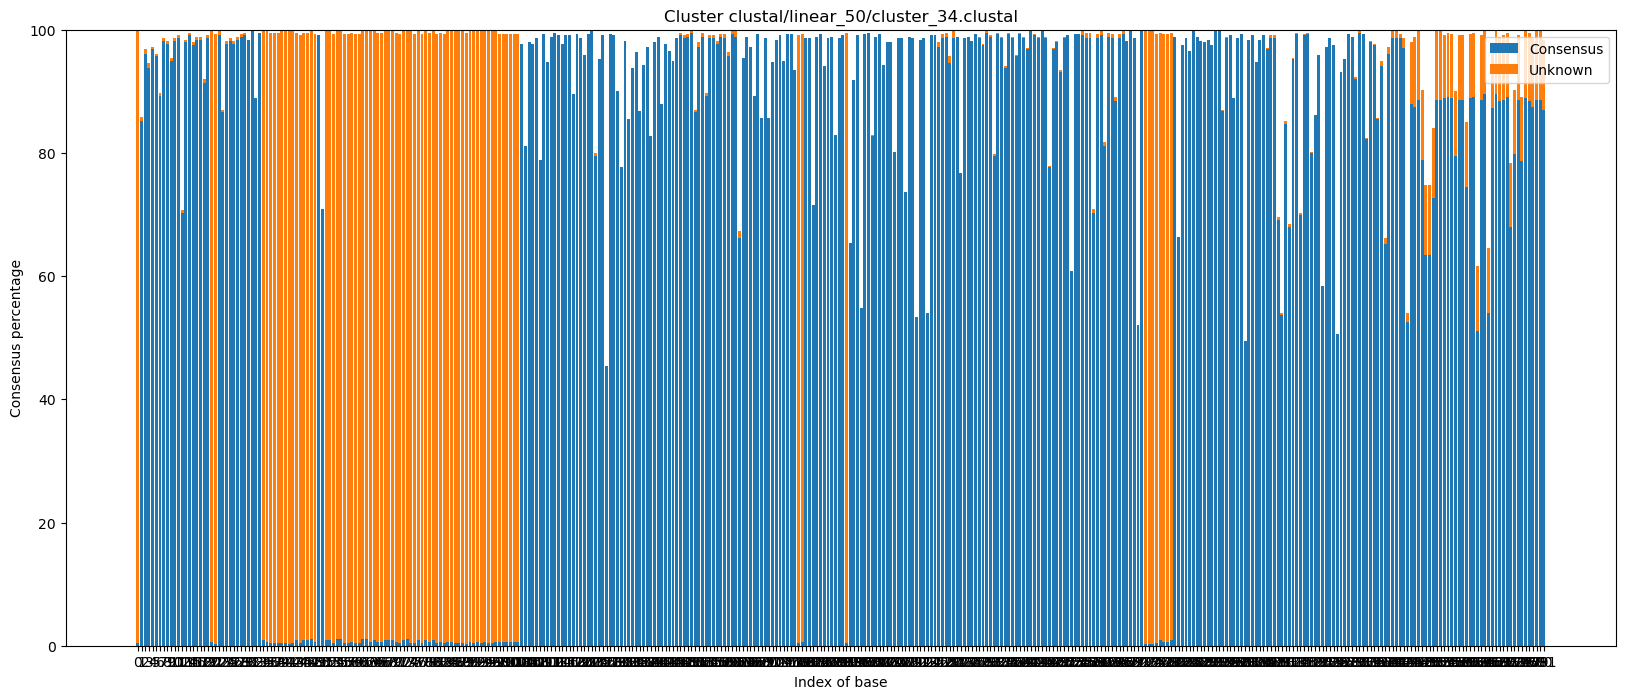

Plot for cluster 35


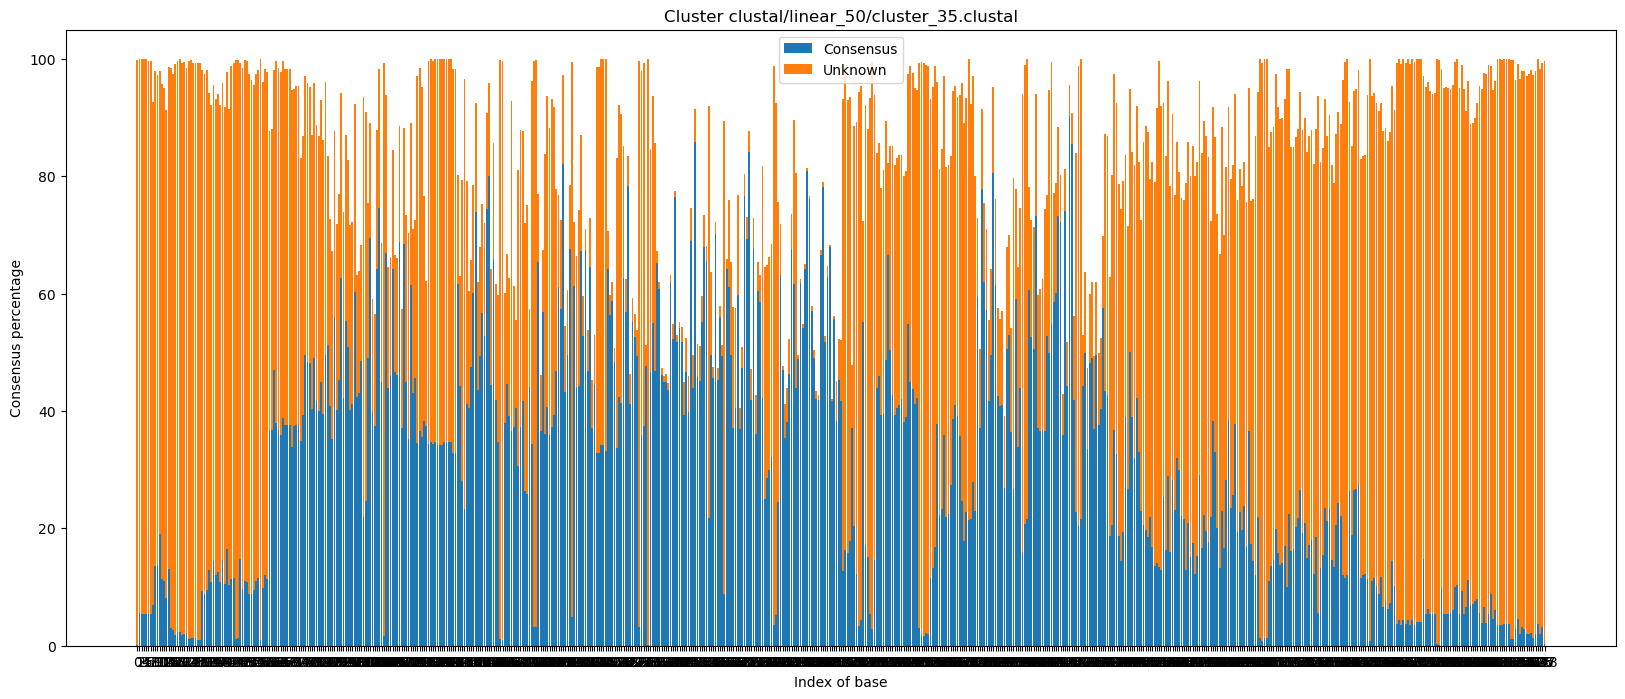

Plot for cluster 36


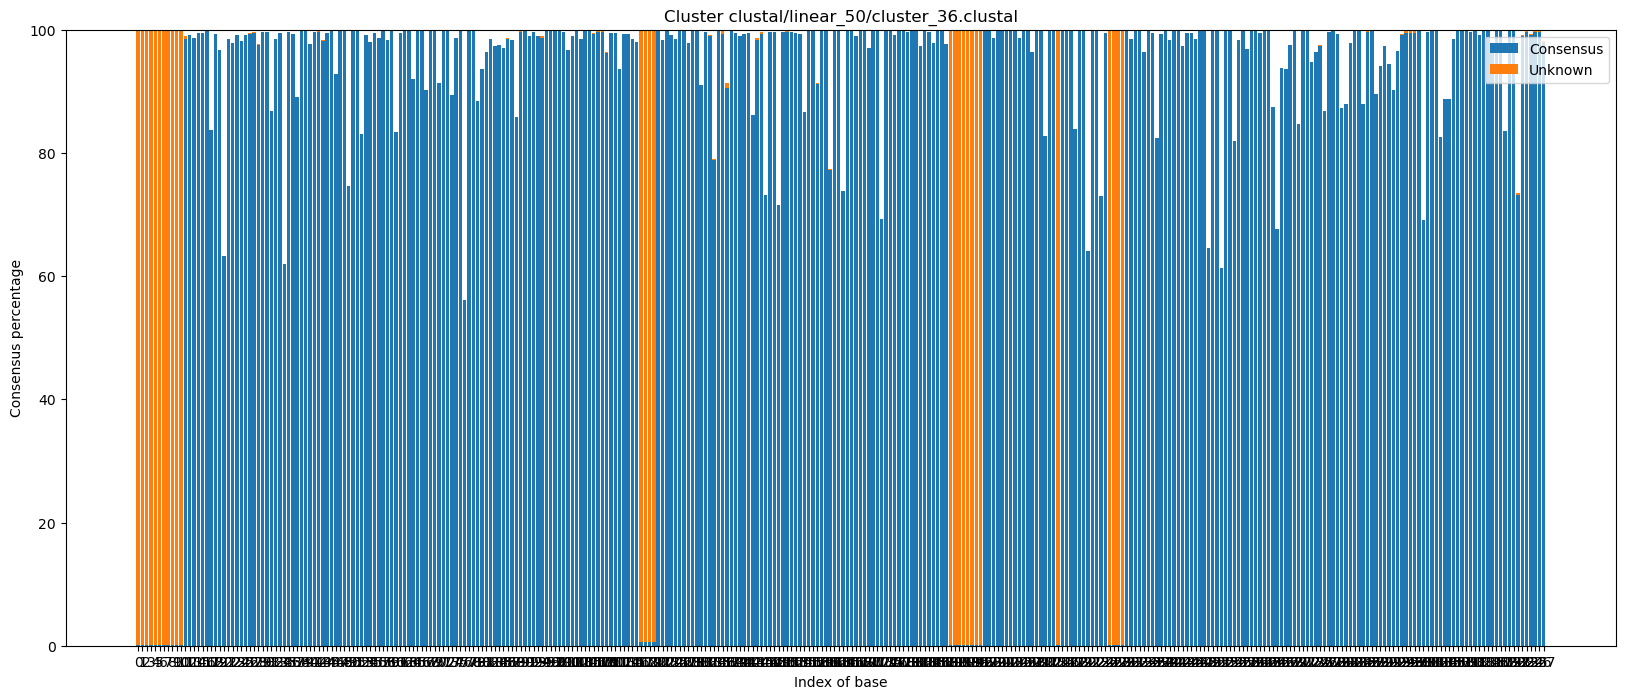

Plot for cluster 37


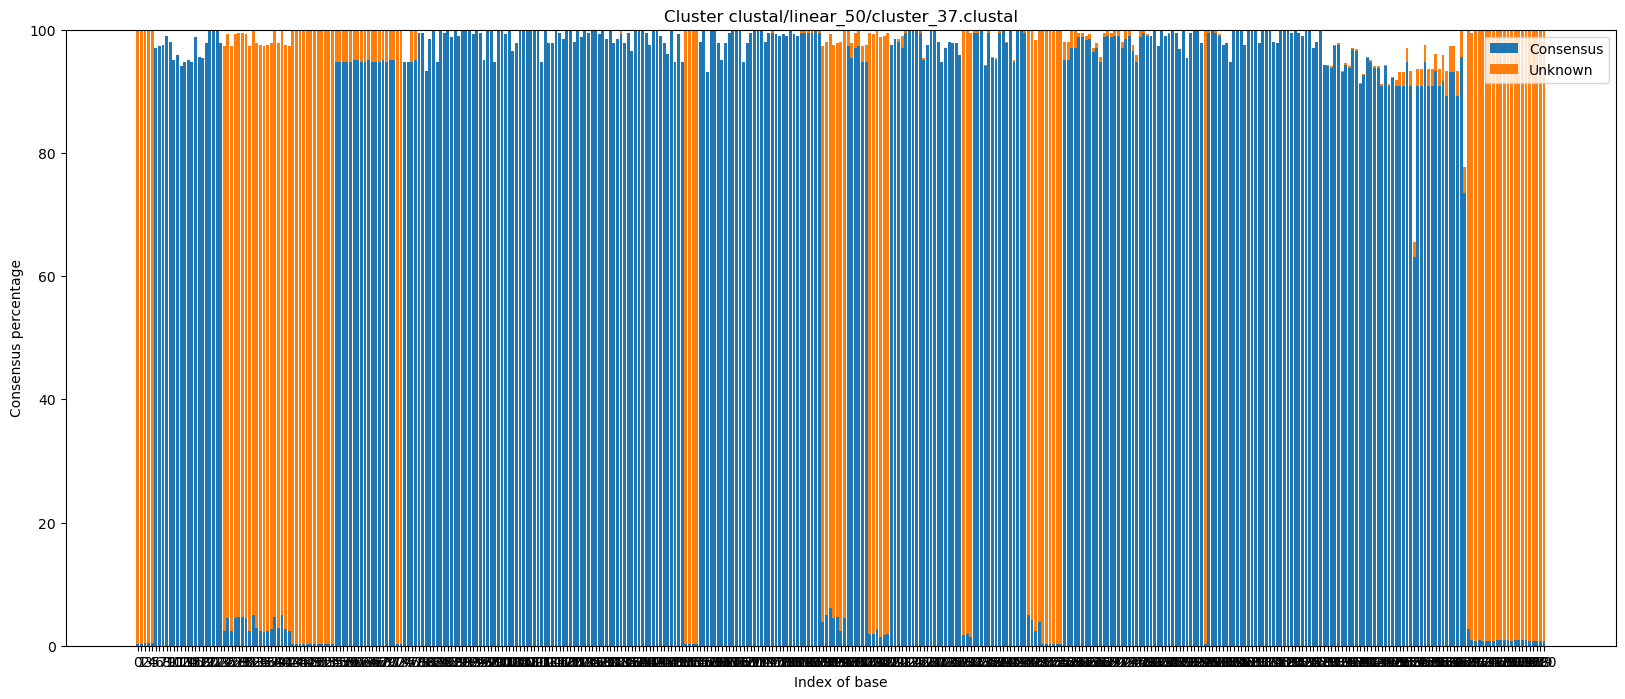

Plot for cluster 38


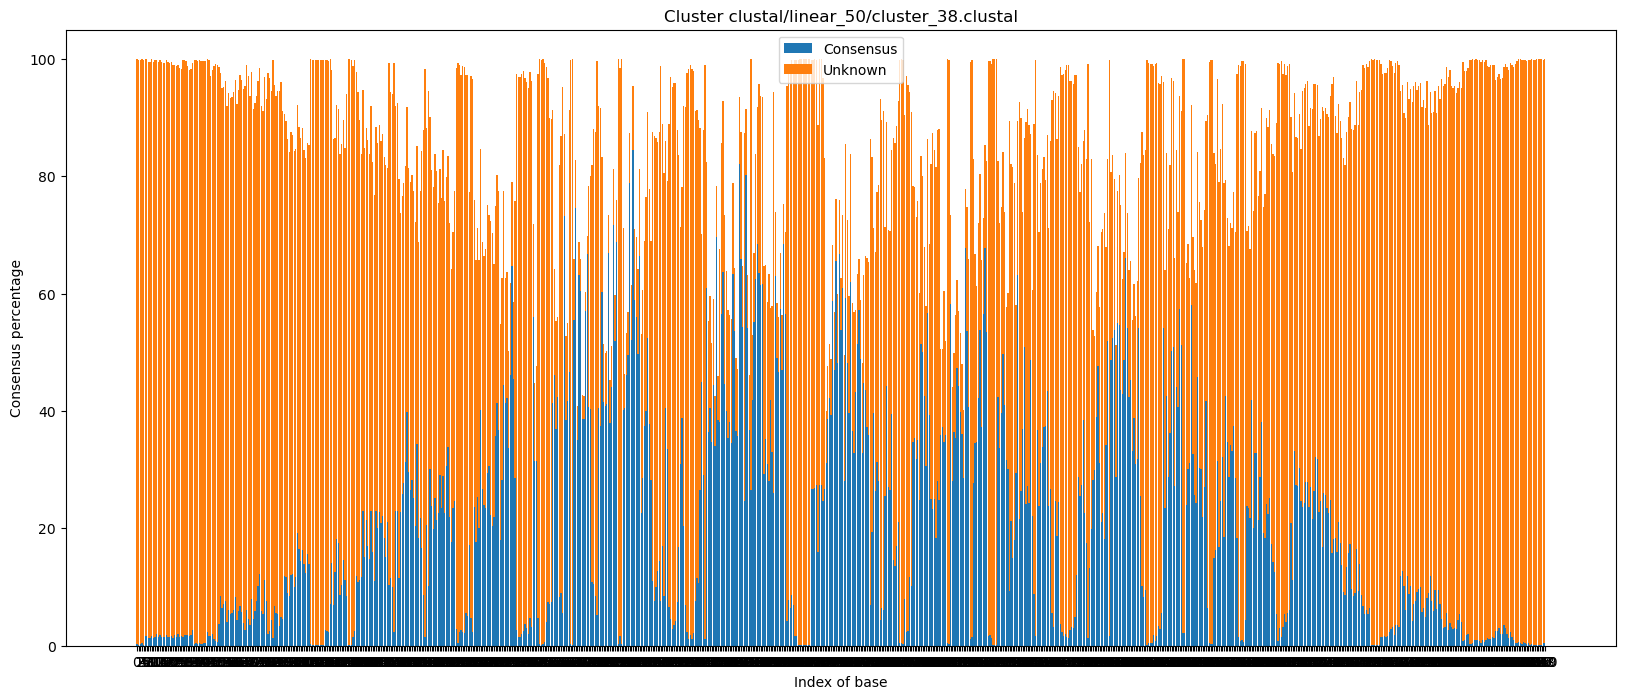

Plot for cluster 39


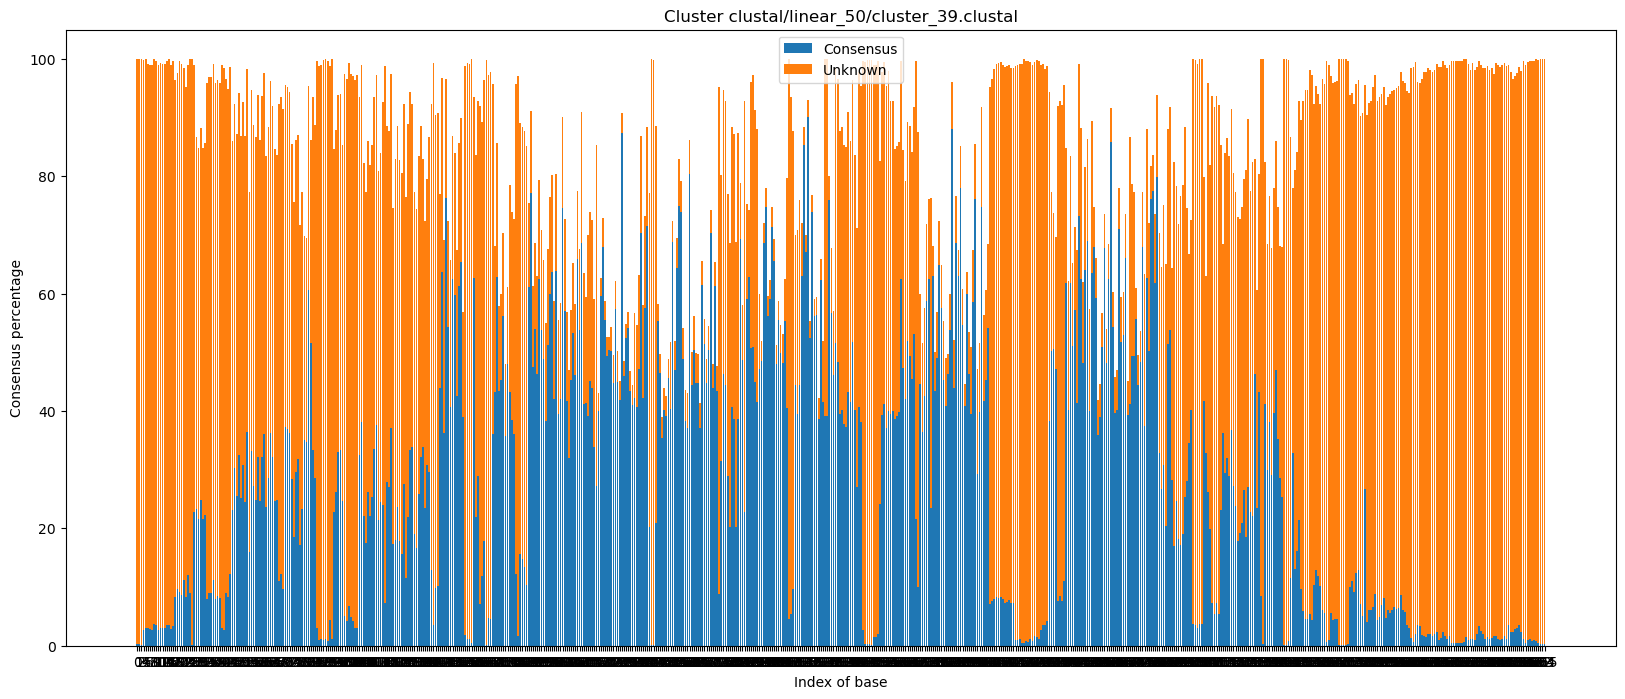

Plot for cluster 40


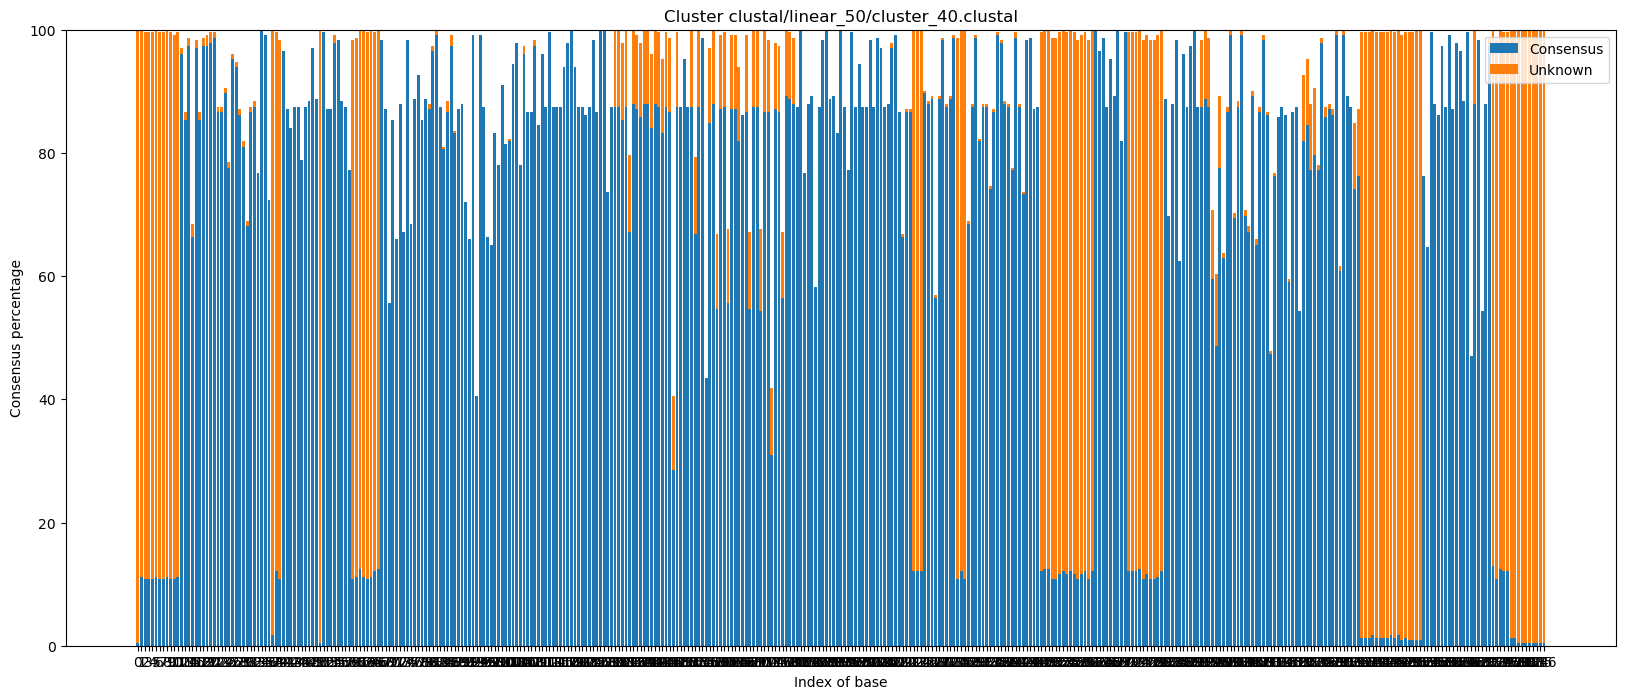

Plot for cluster 41


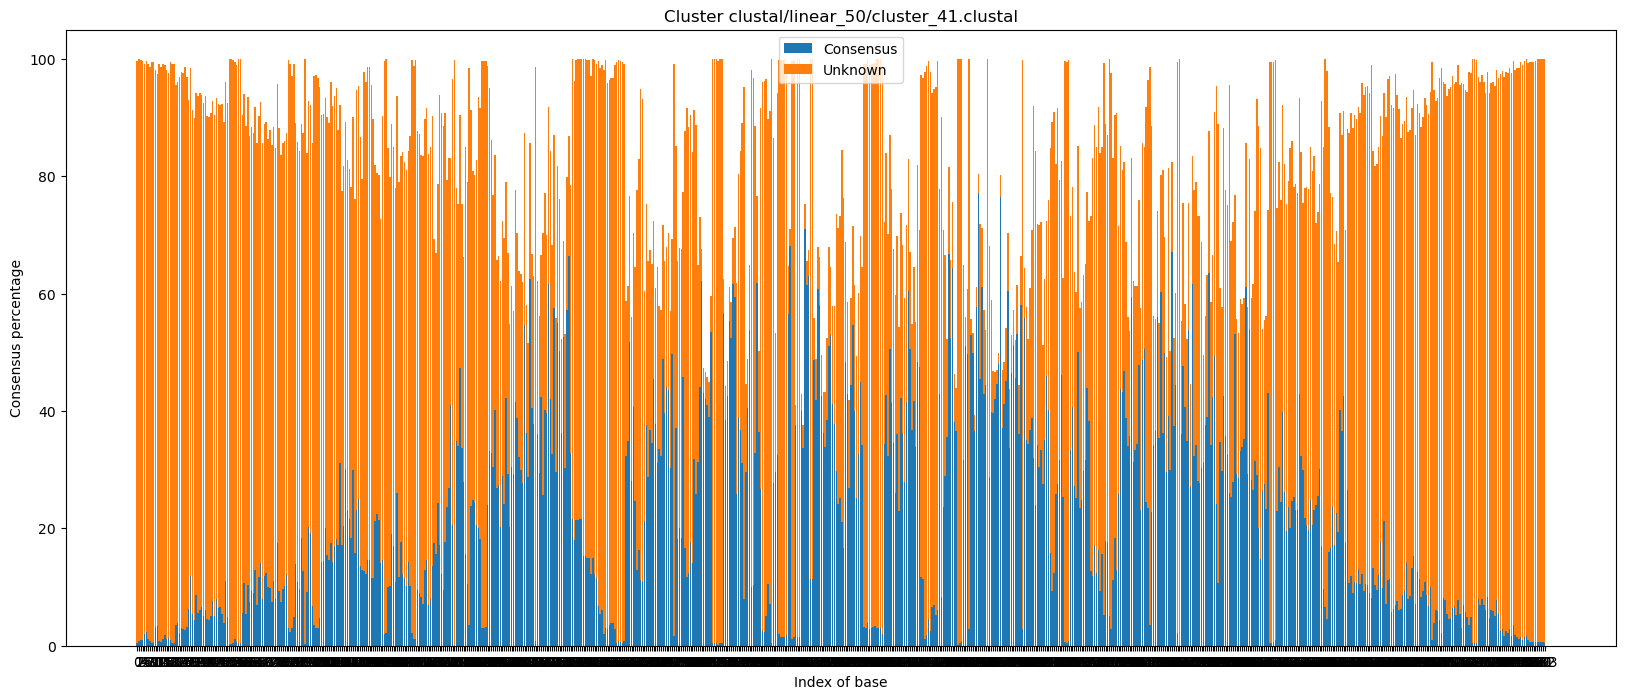

Plot for cluster 42


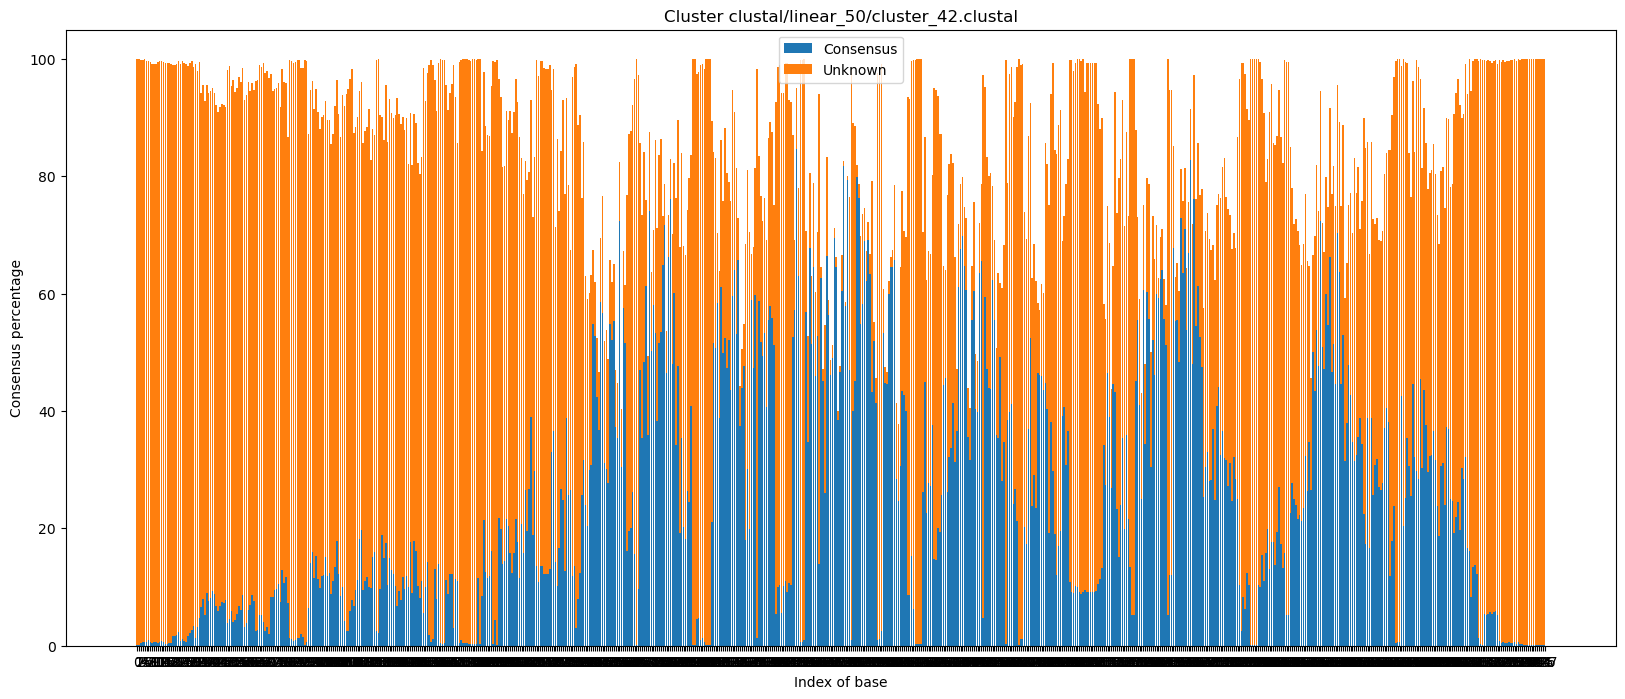

Plot for cluster 43


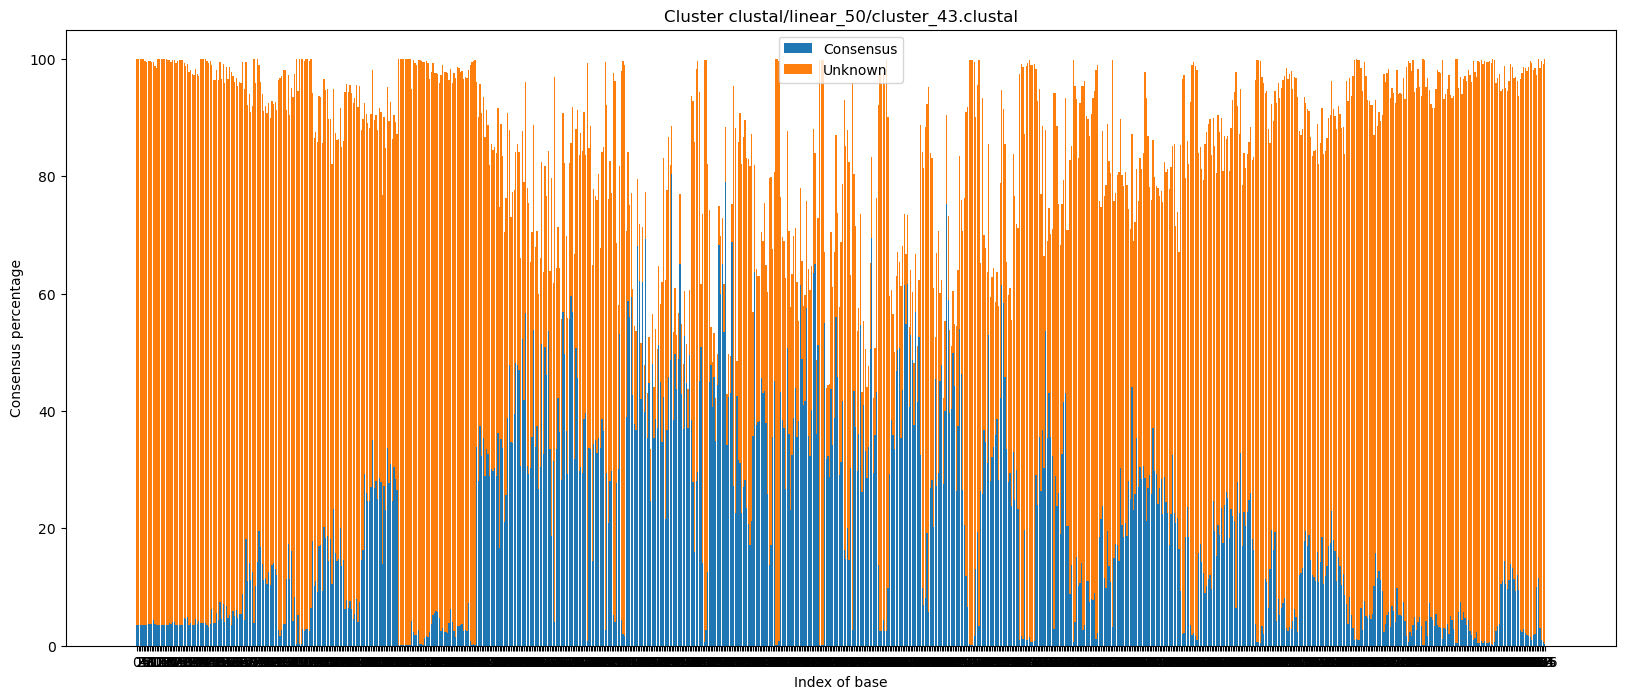

Plot for cluster 44


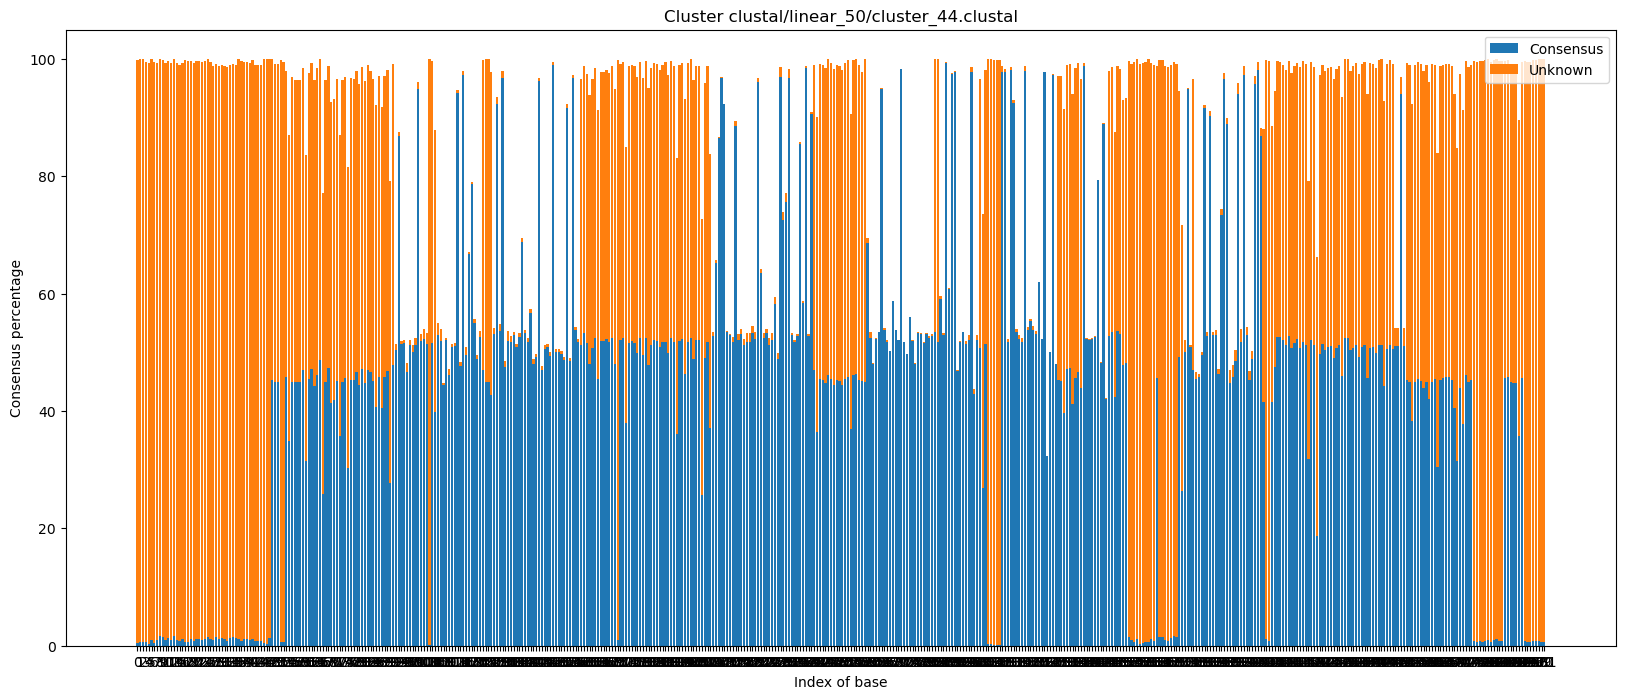

Plot for cluster 45


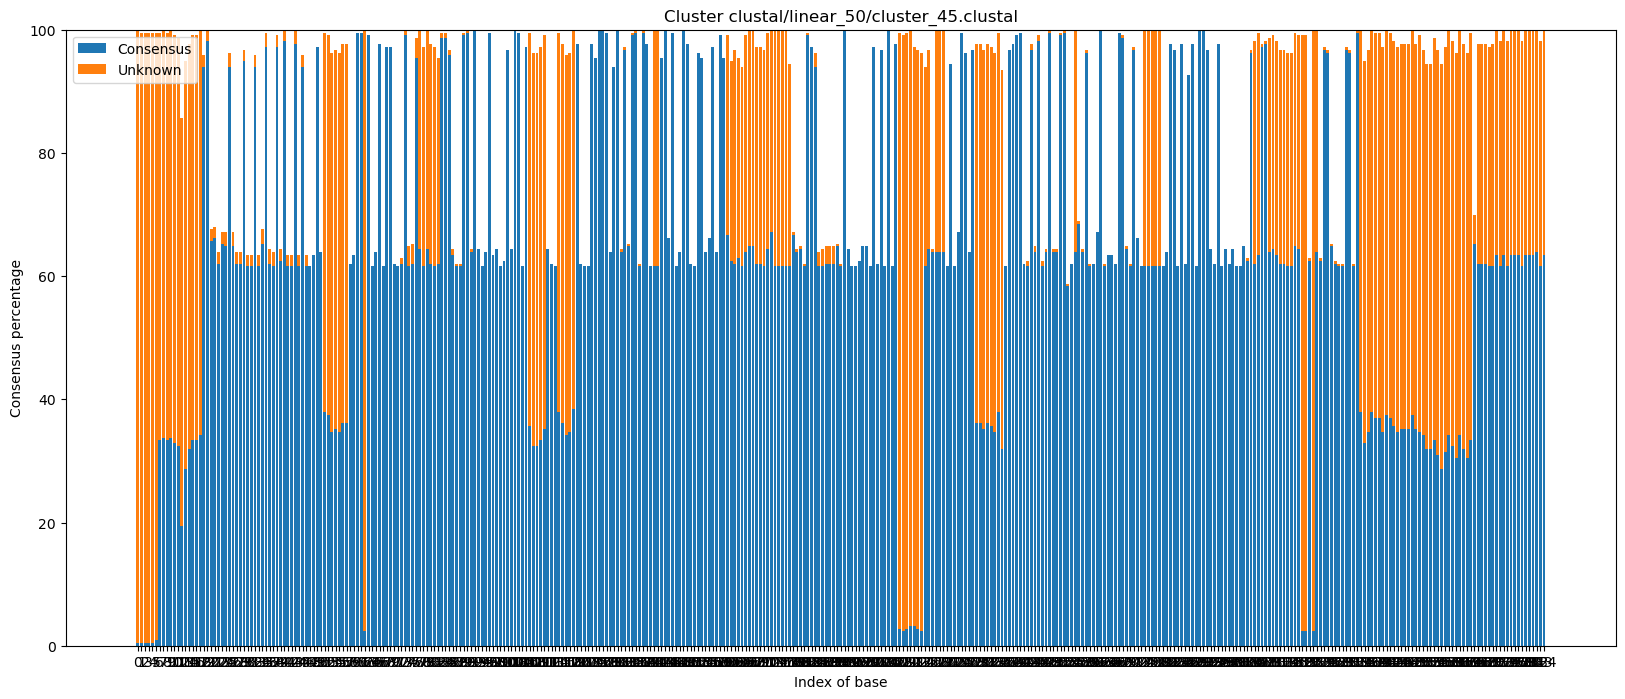

Plot for cluster 46


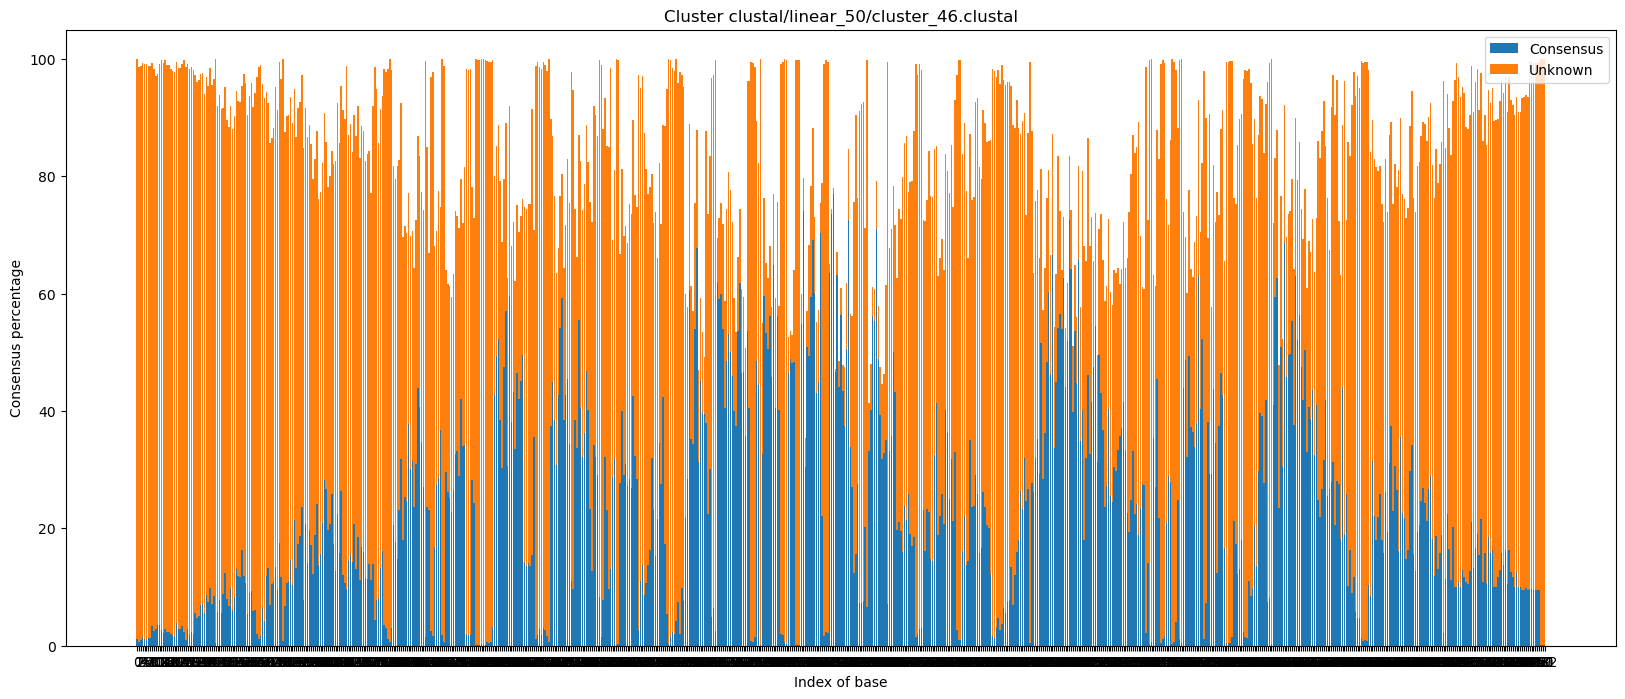

Plot for cluster 47


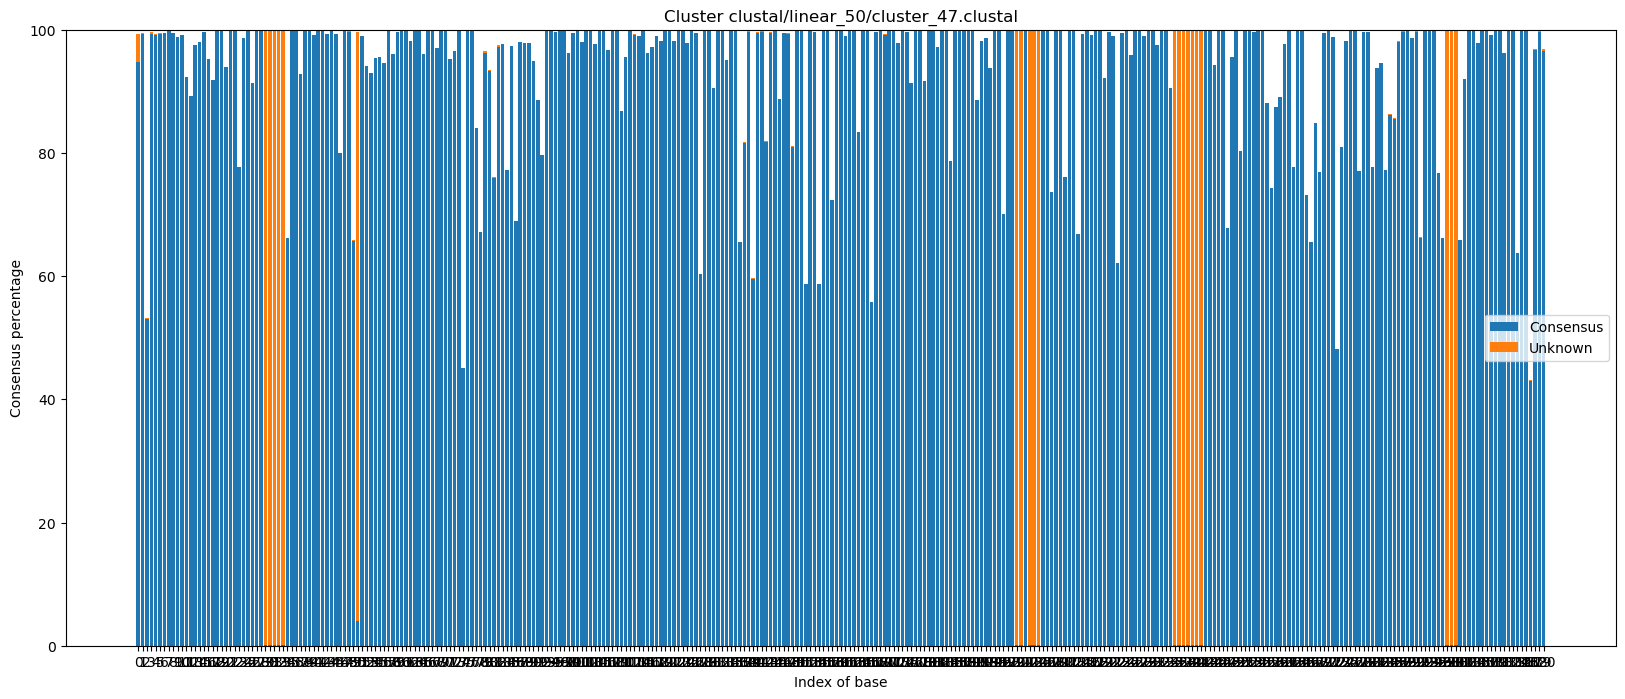

Plot for cluster 48


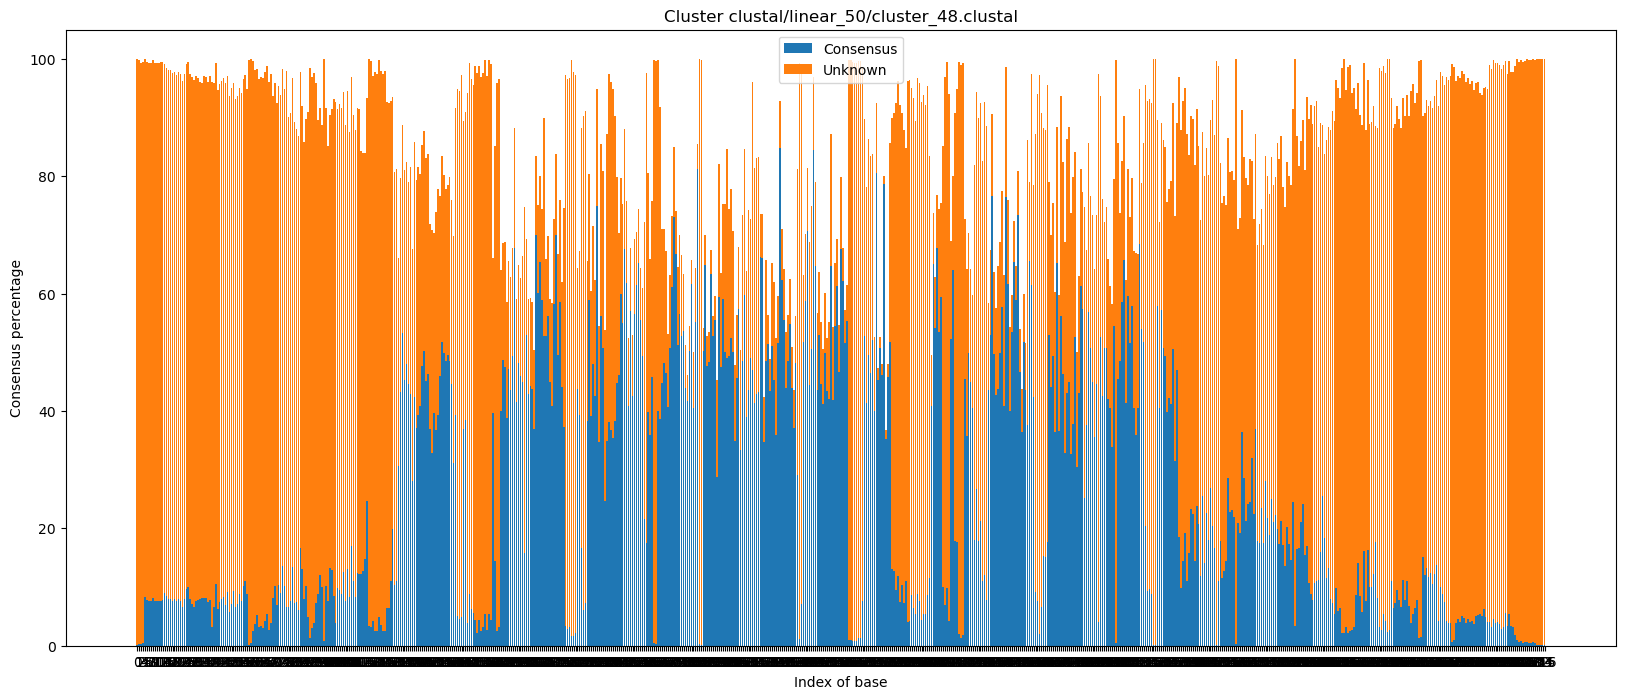

Plot for cluster 49


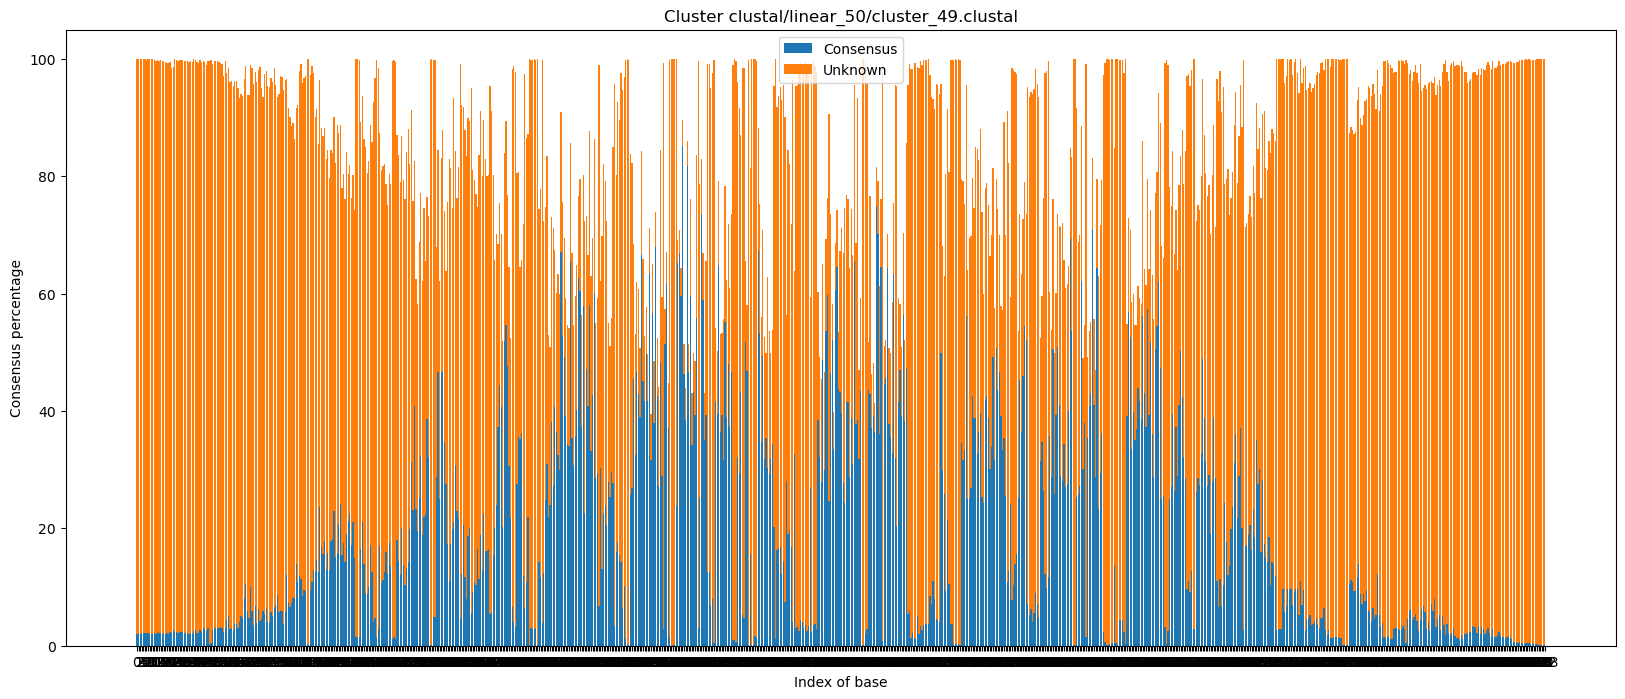

In [15]:
plotClusterRange("linear_50", 0, num_clusters, unique_labels)

In [10]:
print(np.mean(percentages))
print(np.median(percentages))
print(np.std(percentages))

36.18472788517691
47.754649130697786
24.471168648761296


In [11]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel("linear_50", cluster_labels, unique_labels, stride=1)

In [12]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[0, 0, 97.32546842470506, 98.04, 68.45997088791849, 95.0578813250819, 0, 96.44942528735632, 0, 96.84210526315789, 0, 0, 96.63270777479893, 0, 0, 98.16510903426791, 0, 96.82510288065843, 0, 0, 85.20338983050847, 0, 96.0759493670886, 97.38717339667458, 97.5030303030303, 94.504816955684, 0, 96.41515934539191, 94.09577464788732, 0, 0, 88.99365079365079, 0, 0, 95.4590909090909, 0, 97.02350813743219, 99.07616707616708, 0, 0, 87.9396551724138, 0, 0, 0, 0, 79.14814814814815, 0, 97.09540636042402, 0, 0]
[0.      0.      2.80492 1.56864 0.94064 5.22248 0.      3.35644 0.
 1.0672  0.      0.      1.44176 0.      0.      1.26044 0.      1.88228
 0.      0.      1.0054  0.      1.0626  0.82    0.96528 0.98096 0.
 2.23876 0.66808 0.      0.      1.12132 0.      0.      0.84004 0.
 1.07308 0.80648 0.      0.      0.40804 0.      0.      0.      0.
 0.34192 0.      1.09912 0.      0.     ]
32.975880000000004
0.6595176


In [13]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.46

In [14]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [15]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 418, 1: 575, 2: 741, 3: 343, 4: 339, 5: 1006, 6: 785, 7: 704, 8: 1217, 9: 302, 10: 362, 11: 894, 12: 363, 13: 1026, 14: 734, 15: 343, 16: 1011, 17: 513, 18: 734, 19: 542, 20: 344, 21: 1081, 22: 334, 23: 247, 24: 293, 25: 338, 26: 383, 27: 521, 28: 188, 29: 465, 30: 853, 31: 425, 32: 360, 33: 538, 34: 220, 35: 262, 36: 123, 37: 21, 38: 731, 39: 455, 40: 118, 41: 859, 42: 545, 43: 715, 44: 429, 45: 72, 46: 678, 47: 301, 48: 488, 49: 1019}
{0: {'linza': 3, 'multiflora': 3, 'paraensis': 2, 'decorticatum': 2, 'bischlerianus': 1, 'lucida': 1, 'pulchella': 1, 'sinensis': 1, 'ptychothecium': 1, 'glabra': 3, 'mapourioides': 1, 'madagascariensis': 1, 'cristata': 2, 'crassifolia': 1, 'japonica': 3, 'subterminalis': 7, 'borhidiana': 1, 'herbacea': 2, 'gongrijpii': 2, 'cavifolia': 4, 'vitrea': 1, 'kansuensis': 5, 'australe': 1, 'venulosa': 3, 'environmental': 2, 'uraiana': 1, 'ulicina': 1, 'pendula': 1, 'sp.': 45, 'acutangula': 1, 'tibetica': 1, 'tenellum': 1, 'lactuca': 20, 'obscura': 15, 'inv